### Data Description

 - The dataset, released by Aspiring Minds as part of the Aspiring Mind Employment Outcome 2015 (AMEO) study, focuses on employment outcomes for engineering graduates. 
- It includes dependent variables such as salary, job titles, and job locations, alongside standardized scores for cognitive, technical, and personality skills. 
- The dataset also contains demographic features and consists of around 40 independent variables (both continuous and categorical) and 4000 records. Each candidate is uniquely identified within the dataset.

### Objective

- The objective of this project is to analyze and predict employment outcomes of engineering graduates based on their cognitive, technical, personality skills and demographic characteristics.

### Importing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Internship\Data Analysis\Project EDA\data.xlsx - Sheet1.csv")

df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.shape

(3998, 39)

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
column = ['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity','Gender', 'DOB', '10percentage', '10board', '12graduation','12percentage', '12board',
          'CollegeTier', 'Degree','Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical',
          'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 
          'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Disable scientific notation for floats
pd.set_option('display.float_format', '{:.0f}'.format)

for col in column:
    print(f"Description for {col}:")
    print(df[col].describe())
    print("\n")

Description for Salary:
count      3998
mean     307700
std      212737
min       35000
25%      180000
50%      300000
75%      370000
max     4000000
Name: Salary, dtype: float64


Description for DOJ:
count            3998
unique             81
top       7/1/14 0:00
freq              199
Name: DOJ, dtype: object


Description for DOL:
count        3998
unique         67
top       present
freq         1875
Name: DOL, dtype: object


Description for Designation:
count                  3998
unique                  419
top       software engineer
freq                    539
Name: Designation, dtype: object


Description for JobCity:
count          3998
unique          339
top       Bangalore
freq            627
Name: JobCity, dtype: object


Description for Gender:
count     3998
unique       2
top          m
freq      3041
Name: Gender, dtype: object


Description for DOB:
count            3998
unique           1872
top       1/1/91 0:00
freq               11
Name: DOB, dtype: object



In [6]:
data = df[column]

data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,1,1,1,1,-0
1,500000,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85,cbse,2007,...,-1,-1,-1,-1,-1,-1,0,1,-0,1
2,325000,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85,cbse,2010,...,-1,-1,-1,-1,-1,0,2,0,-1,1
3,1100000,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,86,cbse,2007,...,-1,-1,-1,-1,-1,0,0,-0,-0,-1
4,200000,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78,cbse,2008,...,-1,-1,-1,-1,-1,-1,-0,-1,0,-0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

In [8]:
# Replace -1 with 'Unknown'
data['JobCity'].replace(-1, 'Unknown', inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_1564\108114950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['JobCity'].replace(-1, 'Unknown', inplace=True)
C:\Users\manoj\AppData\Local\Temp\ipykernel_1564\108114950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JobCity'].replace(-1, 'Unknown', inplace=True)


In [9]:
# Replace 0 with 'Unknown'
data['10board'].replace(0, 'Unknown', inplace=True)

data['12board'].replace(0, 'Unknown', inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_1564\2521217501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['10board'].replace(0, 'Unknown', inplace=True)
C:\Users\manoj\AppData\Local\Temp\ipykernel_1564\2521217501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['10board'].replace(0, 'Unknown', inplace=True)
C:\Users\manoj\Ap

### Univariate Analysis

In [10]:
# Define the list of numerical and categorical columns
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA']
categorical_columns = ['Designation', 'JobCity', 'Gender', '10board', '12graduation', '12board', 'Degree', 'Specialization', 'CollegeState', 'CollegeTier',
                       'GraduationYear']    

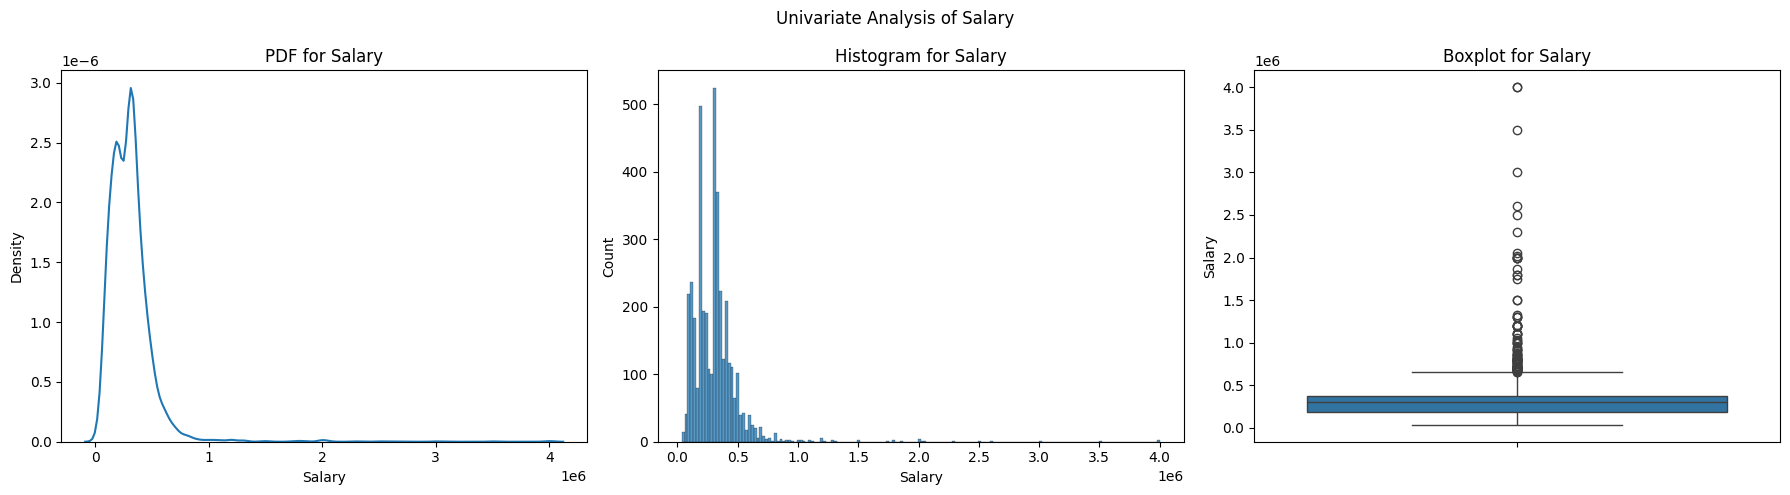

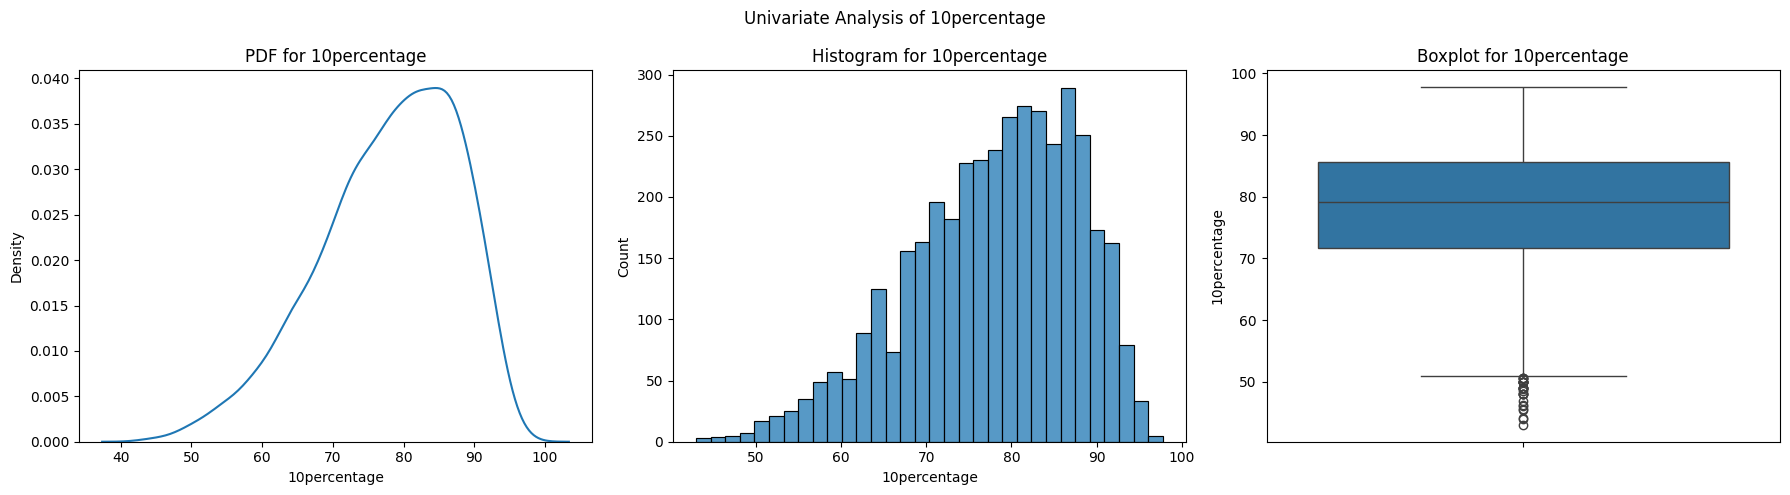

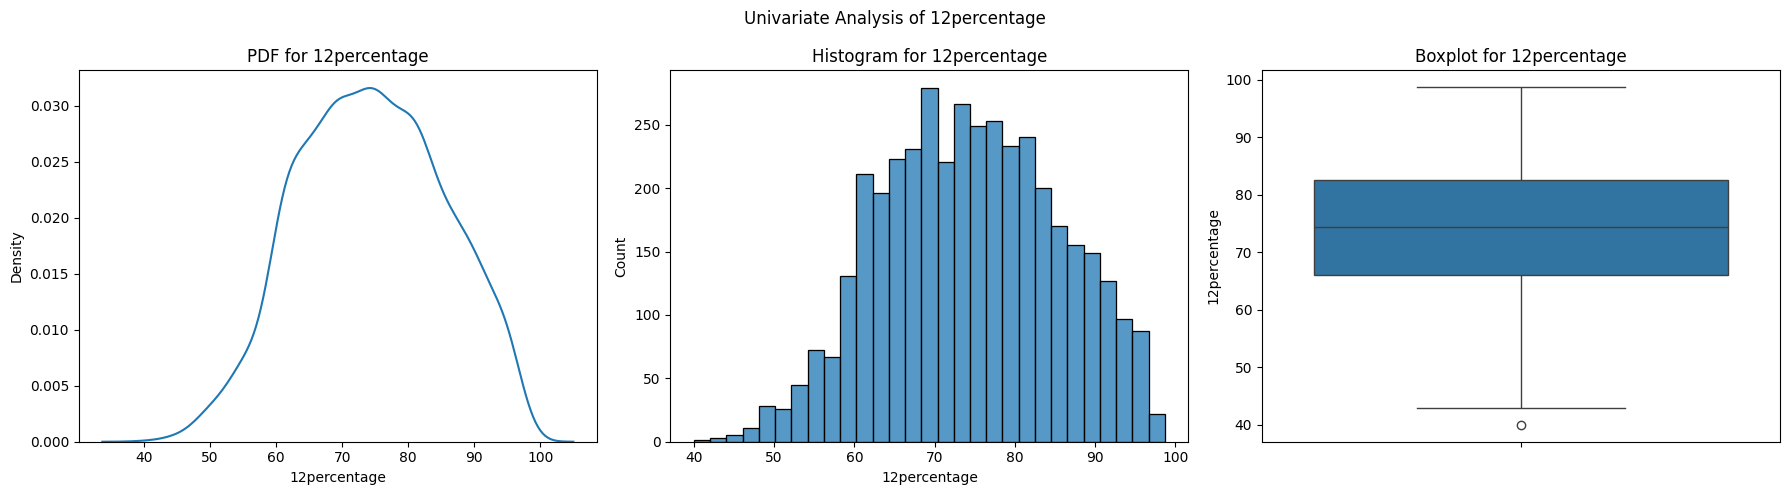

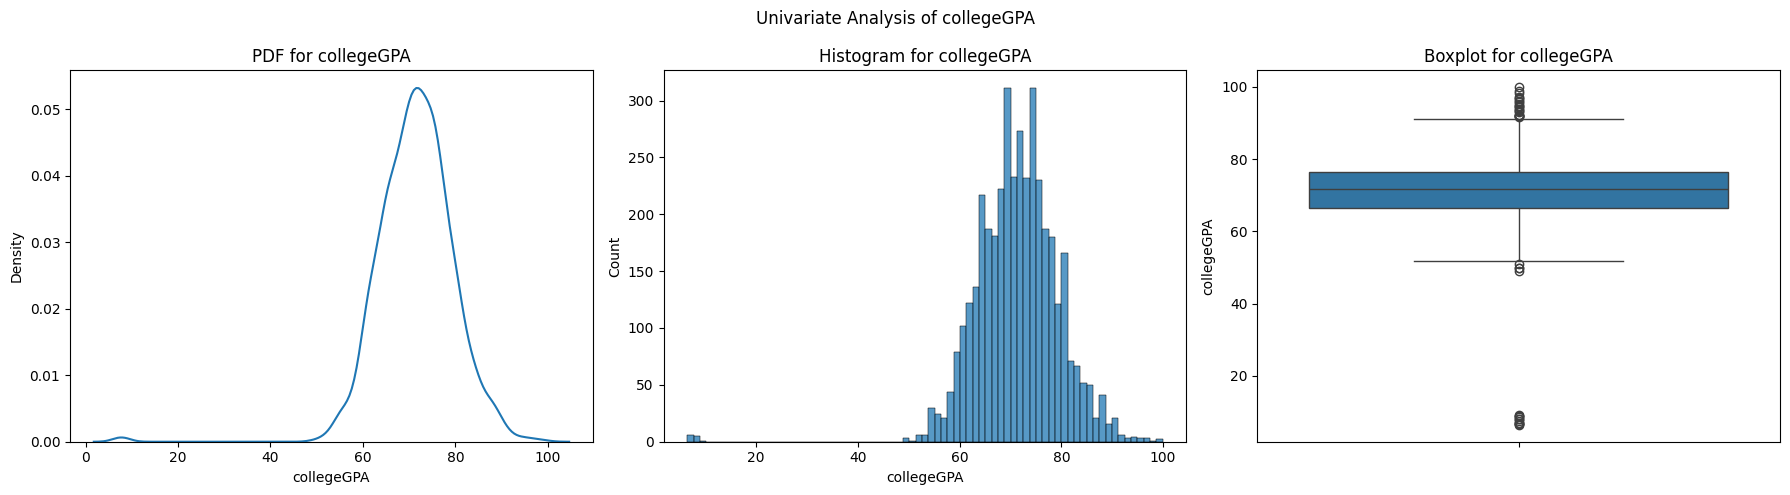

In [11]:
# Create subplots for numerical columns
for col in numerical_columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Univariate Analysis of {col}")

    # PDF using seaborn's kdeplot
    sns.kdeplot(data[col], ax=axes[0])
    axes[0].set_title(f"PDF for {col}")

    # Histogram
    sns.histplot(data[col], ax=axes[1], kde=False)
    axes[1].set_title(f"Histogram for {col}")

    # Boxplot
    sns.boxplot(y=data[col], ax=axes[2])
    axes[2].set_title(f"Boxplot for {col}")

    plt.tight_layout()
    plt.show()

- `salary column` - It is right-skewed. A right-skewed histogram indicates that the data has a long tail on the right side, with most values concentrated on the lower end. Most peoples salary is less than 10 lakhs per annum.

- `10percentage column` - It is left-skewed. A left-skewed histogram indicates that the data has a long tail on the left side, with most values concentrated on the higher end. Most peoples 10th percentage is more than 50%.

- `12percentage column` - It is left-skewed. Most peoples 12th percentage is more than 50%.

- `collegeGPA` - It is also left-skewed. Most peoples college GPA is more than 50%.

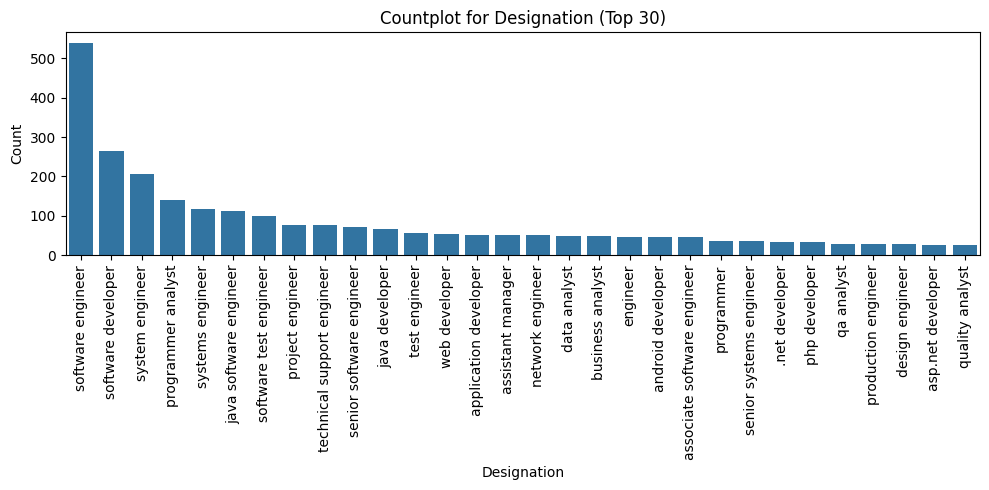

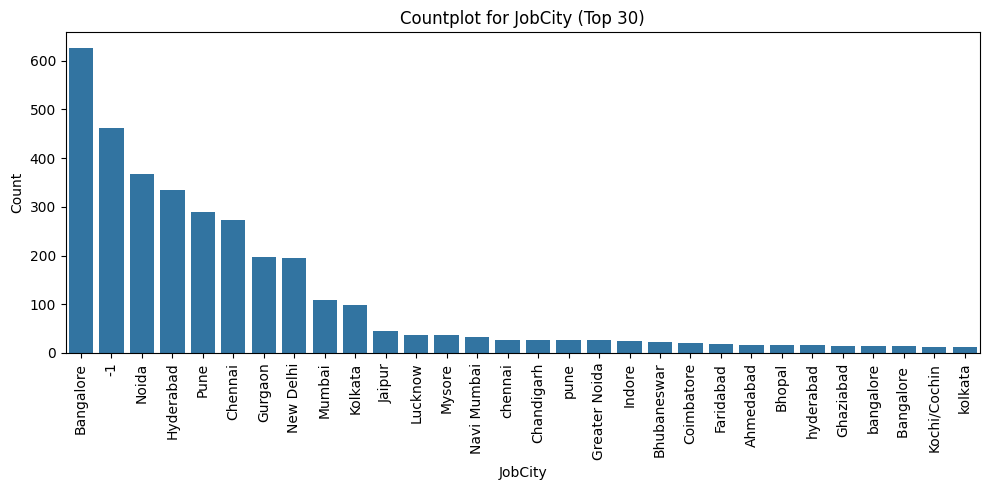

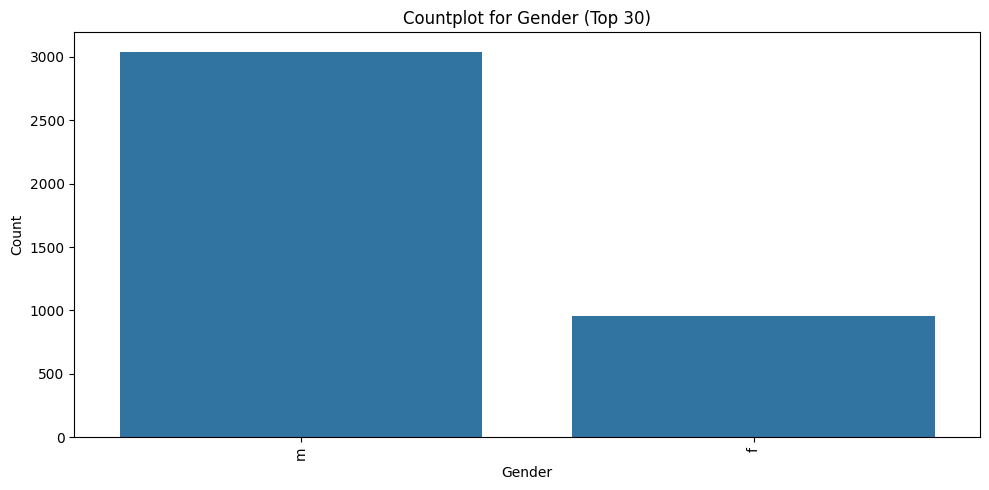

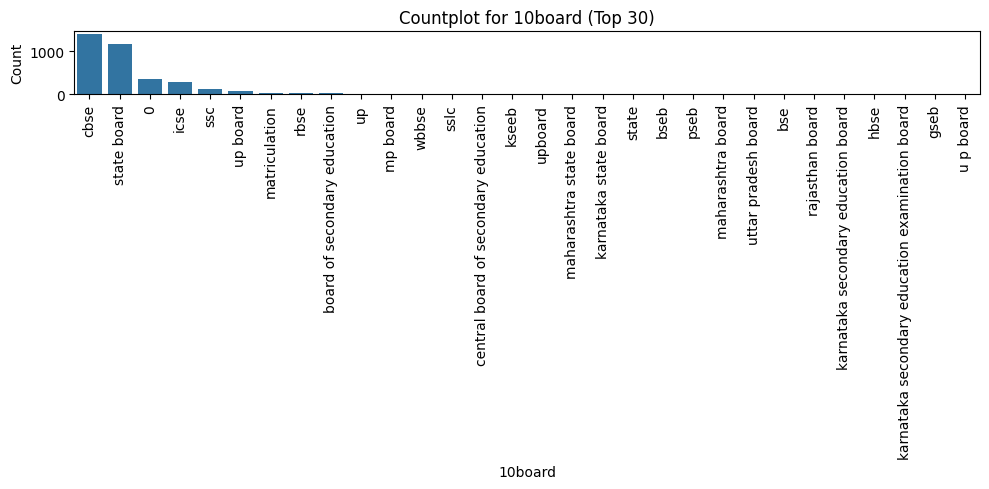

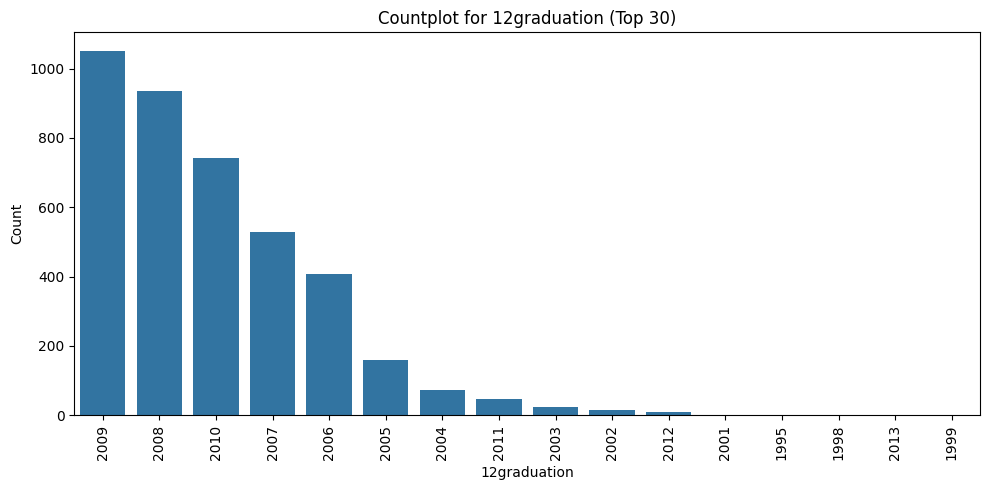

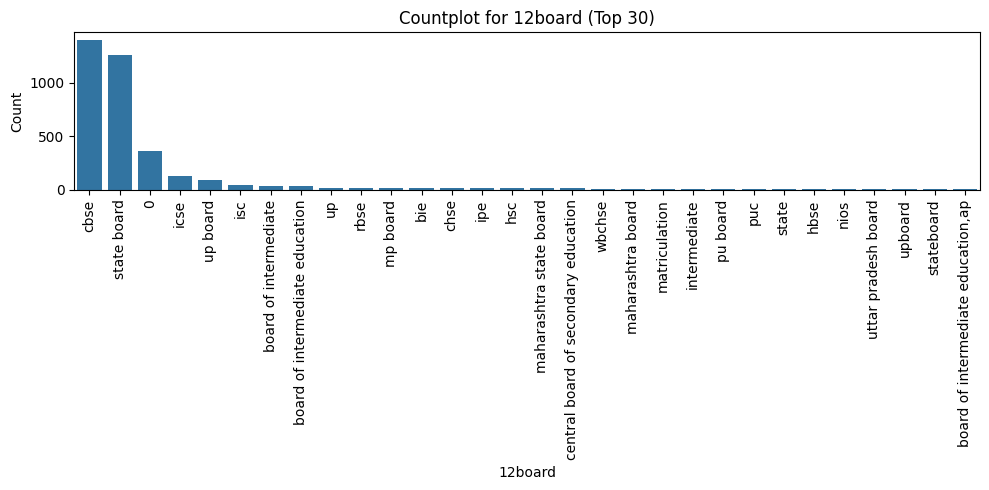

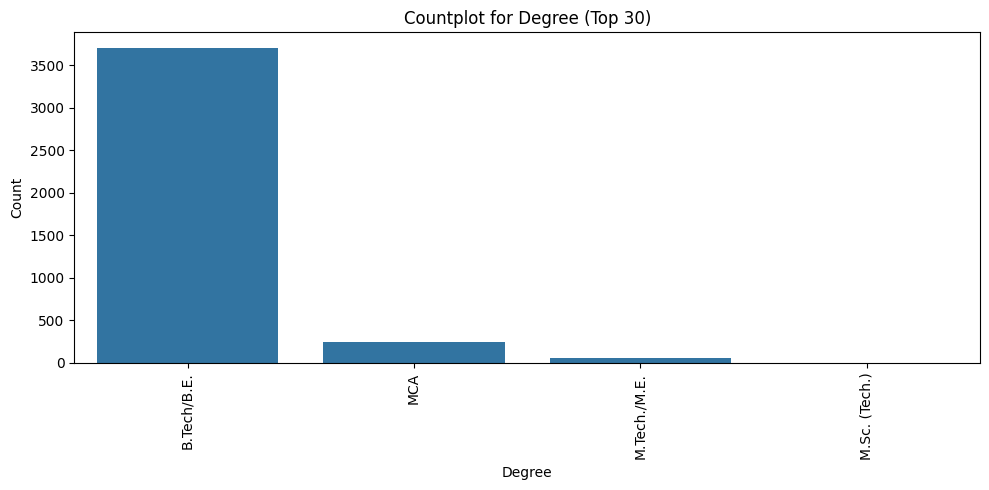

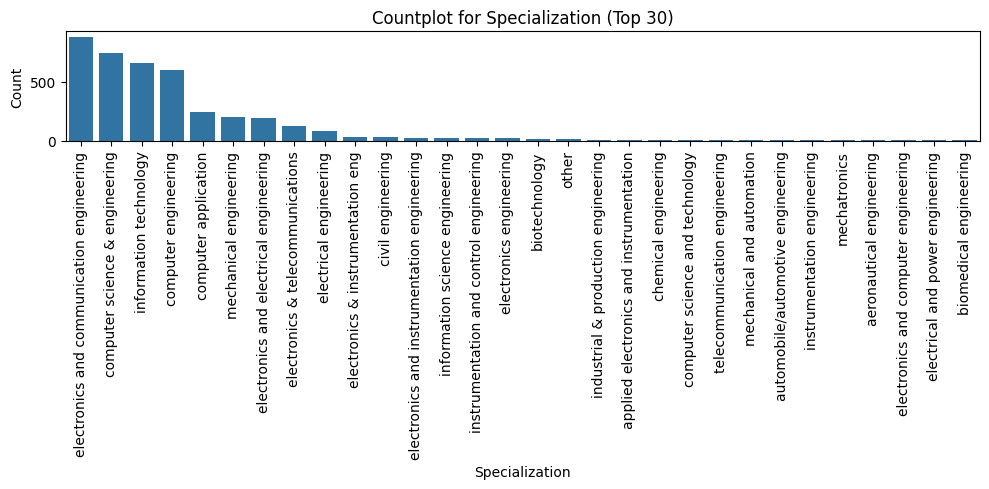

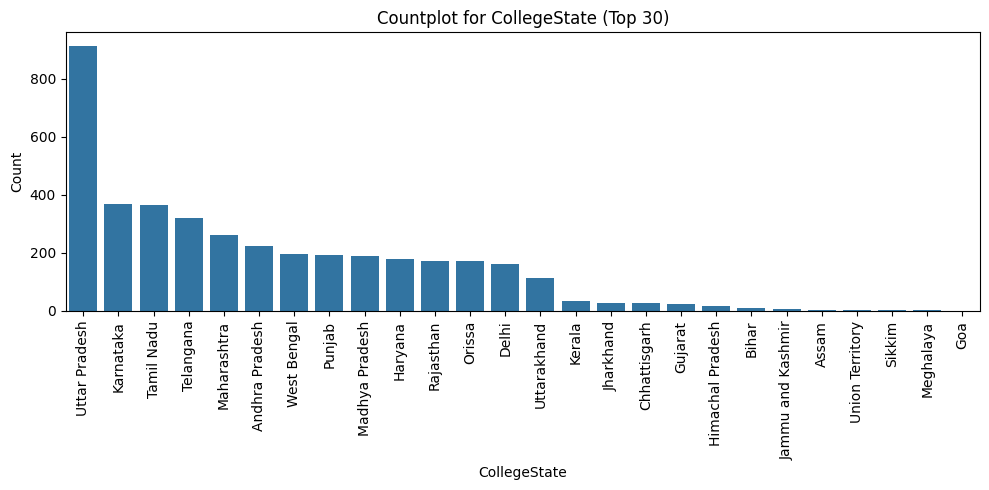

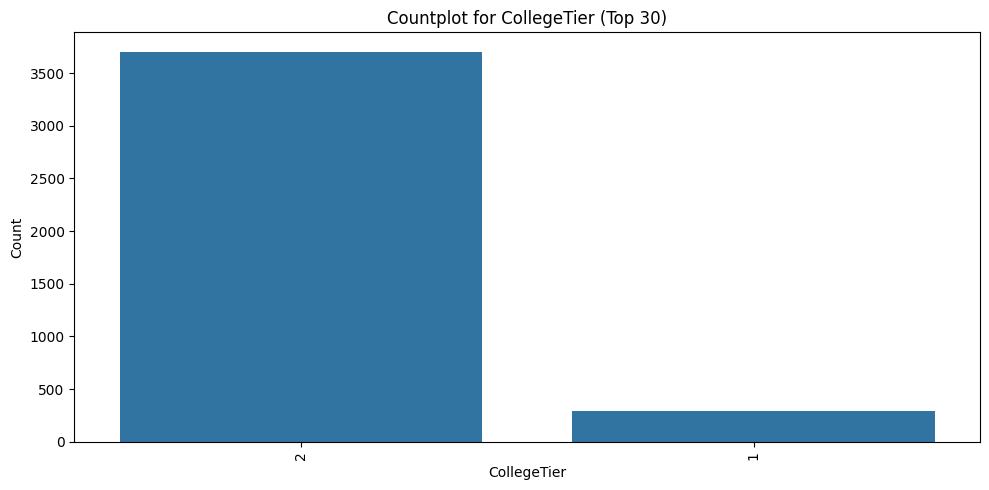

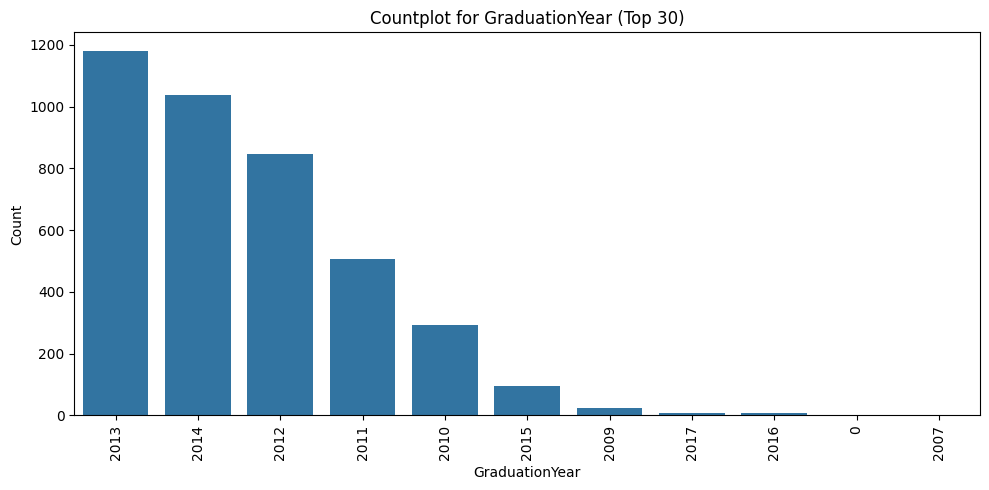

In [12]:
# Create subplots for categorical columns, showing only top 30 categories
for col in categorical_columns:
    # Get the top 30 most frequent categories
    top_30 = data[col].value_counts().nlargest(30).index
    
    # Filter the data to only include these top 30 categories
    filtered_data = data[data[col].isin(top_30)]
    
    # Create the countplot
    fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the figure size as needed
    sns.countplot(x=filtered_data[col], ax=ax, order=top_30)
    ax.set_title(f"Countplot for {col} (Top 30)")
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

- `Designation column` - Most candidates are working as software engineer, then followed by software developer and system engineer.

- `Job City column` - Most candidates are working in Bangalore, then followed by Unknown and Noida.

- `Gender column` - Most candidates are males compared to females.

- `10board column` - Most candidates completed their 10th board with CBSE, then followed by State Board and ICSE.

- `12graduation column` - Most candidates completed their 12th in 2009, then followed by 2008 and 2010.

- `12board column` - Most candidates completed their 12th board with CBSE, then followed by State Board and ICSE.

- `Degree column` - Most candidates completed their Degree in B.Tech./B.E.

- `Specialization column` - Most candidates completed thier Specialization Degree in Electronics & Communication Engineering, then followed by Computer Science & Engineering and Informtion Technology.

- `Graduation Year column` - Most candidates are completed their Graduation in 2013, then followed by 2014 and 2012.

- `College State column` - Most candidates completed their college in Uttar Pradesh, then followed by Karnataka and Tamil Nadu.

- `College Tier column` - Most candidates completed their college in 2nd Ties Colleges.

### Bi-Variate

#### Numerical vs Numerical 

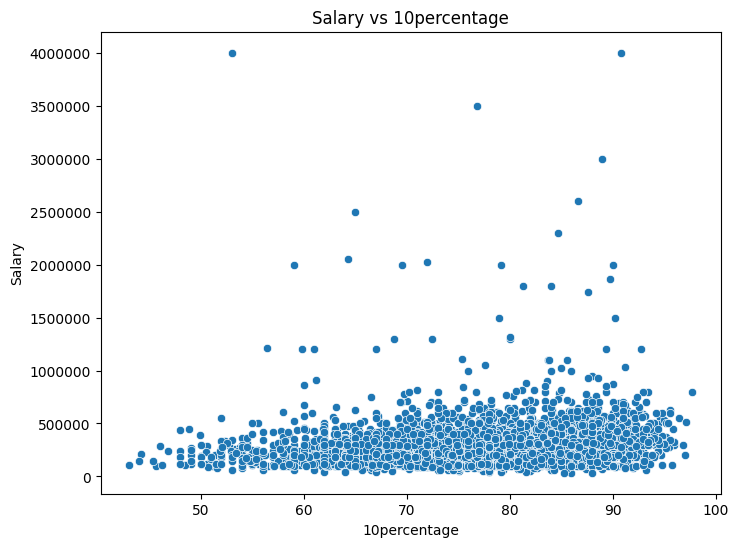

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['10percentage'], y=data['Salary'])
plt.ticklabel_format(style='plain')
plt.title('Salary vs 10percentage')
plt.xlabel('10percentage')
plt.ylabel('Salary')
plt.show()

`Salary vs 10percentage`: There is no impact of early academic performance on salary.

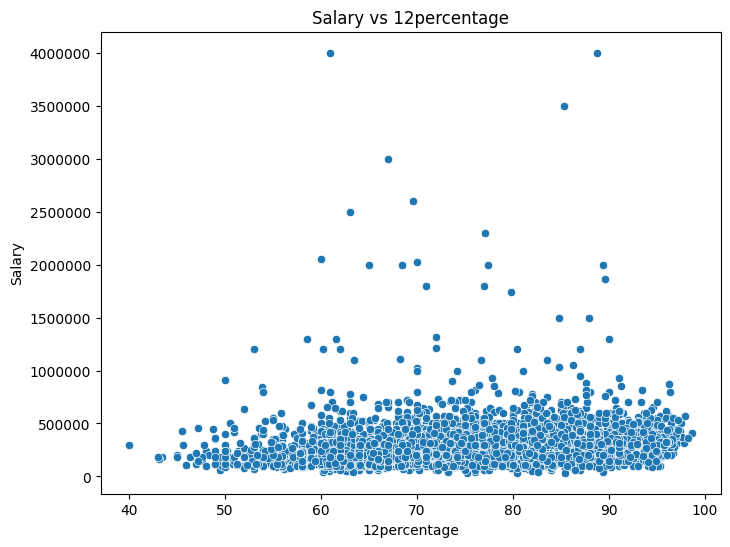

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['12percentage'], y=data['Salary'])
plt.ticklabel_format(style='plain')
plt.title('Salary vs 12percentage')
plt.xlabel('12percentage')
plt.ylabel('Salary')
plt.show()

`Salary vs 12percentage`: There is no impact impact of higher secondary academic performance on salary.

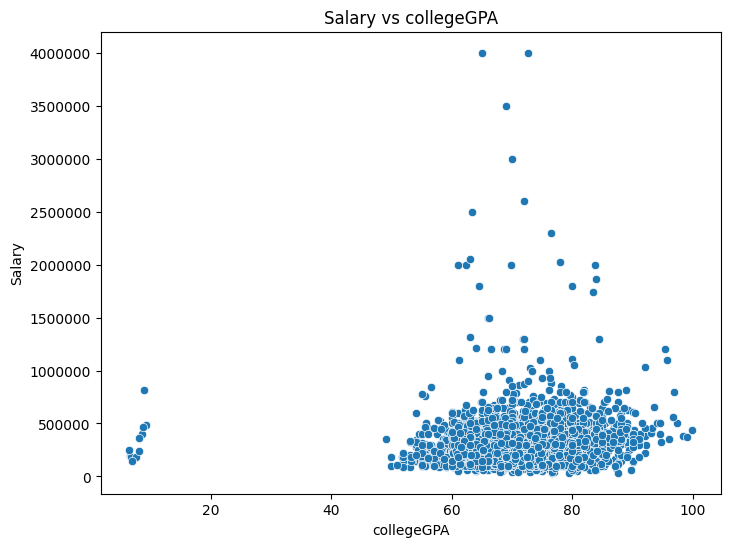

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['collegeGPA'], y=data['Salary'])
plt.ticklabel_format(style='plain')
plt.title('Salary vs collegeGPA')
plt.xlabel('collegeGPA')
plt.ylabel('Salary')
plt.show()

`Salary vs collegeGPA`: Candidate with 50% or higher will get a job.

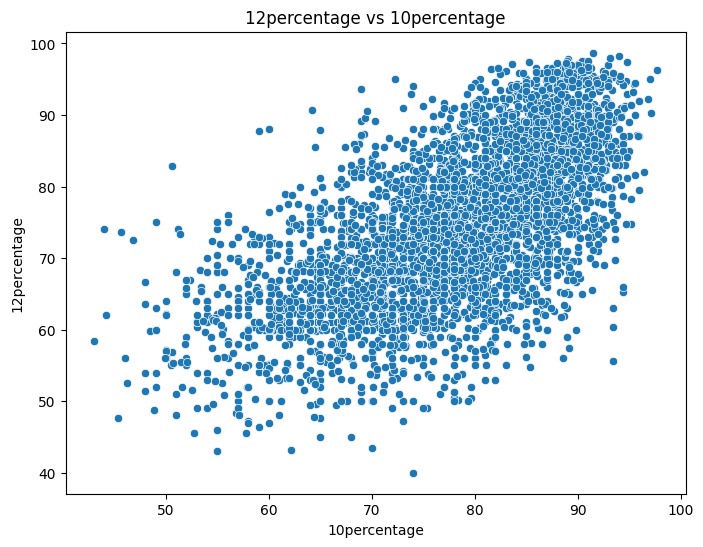

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['10percentage'], y=data['12percentage'])
plt.title('12percentage vs 10percentage')
plt.xlabel('10percentage')
plt.ylabel('12percentage')
plt.show()

`10percentage vs 12percentage`: Candidates with good 10th percentage have a higher chance to get good 12th percentage.

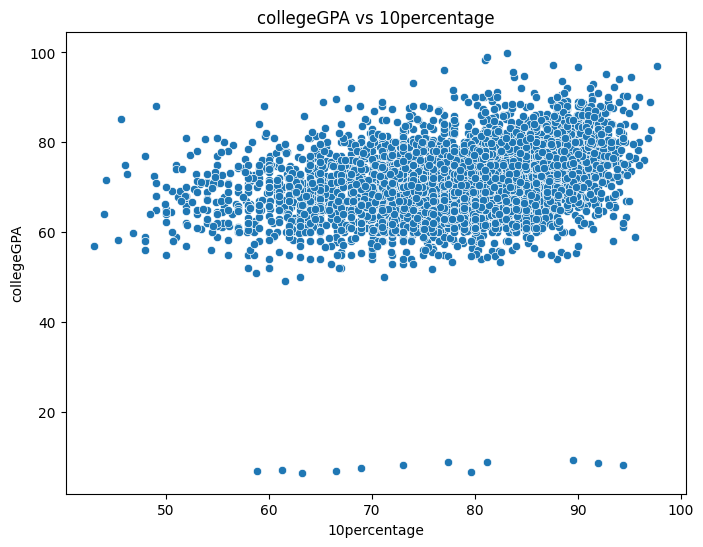

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['10percentage'], y=data['collegeGPA'])
plt.title('collegeGPA vs 10percentage')
plt.xlabel('10percentage')
plt.ylabel('collegeGPA')
plt.show()

`10percentage vs collegeGPA`: Candidates with 50% or higher in College are most likely that their 10th percentage is also more than 50%.

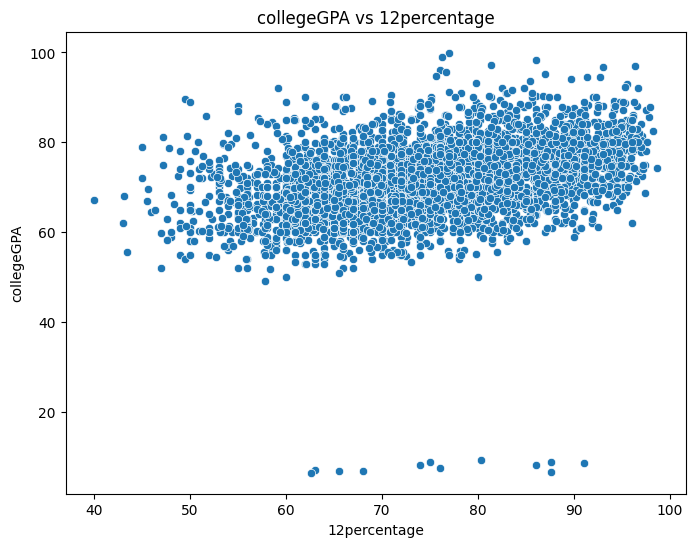

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['12percentage'], y=data['collegeGPA'])
plt.title('collegeGPA vs 12percentage')
plt.xlabel('12percentage')
plt.ylabel('collegeGPA')
plt.show()

`12percentage vs collegeGPA`: Candidates with 50% or higher in College are most likely that their 12th percentage is also more than 50%.

#### Numerical vs Categorical

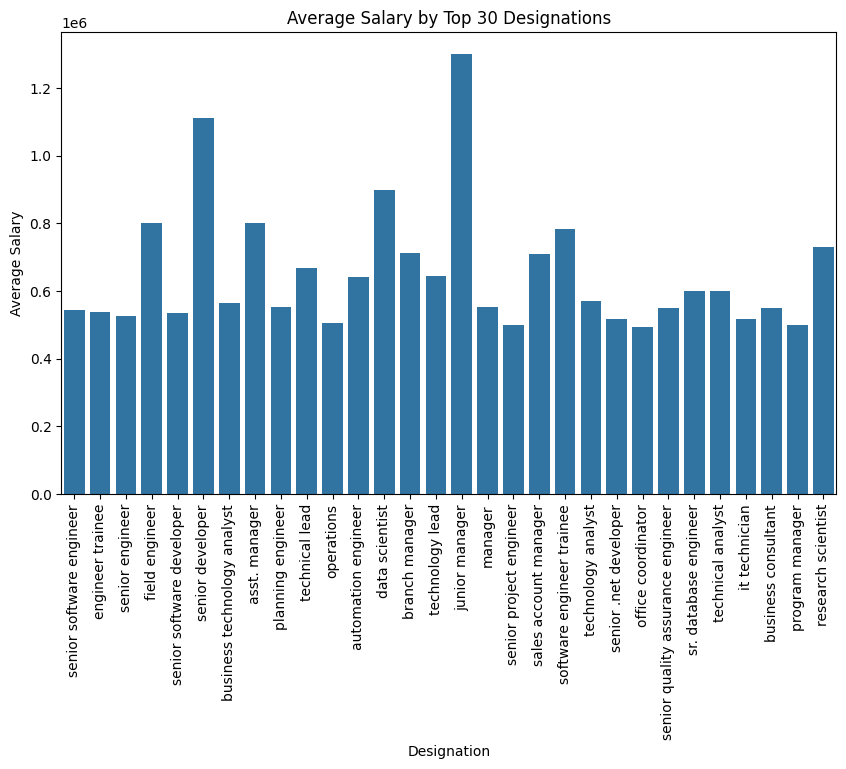

In [19]:
# Step 1: Calculate the average salary for each designation
average_salary_by_designation = data.groupby('Designation')['Salary'].mean().reset_index()

# Step 2: Select the top 30 designations based on average salary
top_30_designations = average_salary_by_designation.nlargest(30, 'Salary')['Designation']

# Step 3: Filter the original data to include only the top 30 designations
filtered_data = data[data['Designation'].isin(top_30_designations)]

# Step 4: Plot the average salary by designation for the top 30 designations
plt.figure(figsize=(10, 6))
sns.barplot(x='Designation', y='Salary', data=filtered_data, estimator='mean', errorbar=None)
plt.title('Average Salary by Top 30 Designations')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

`Salary vs Designation`: Top 3 designaiton which make more average salary are Junior Manager, Senior Developer and Data Scientist.

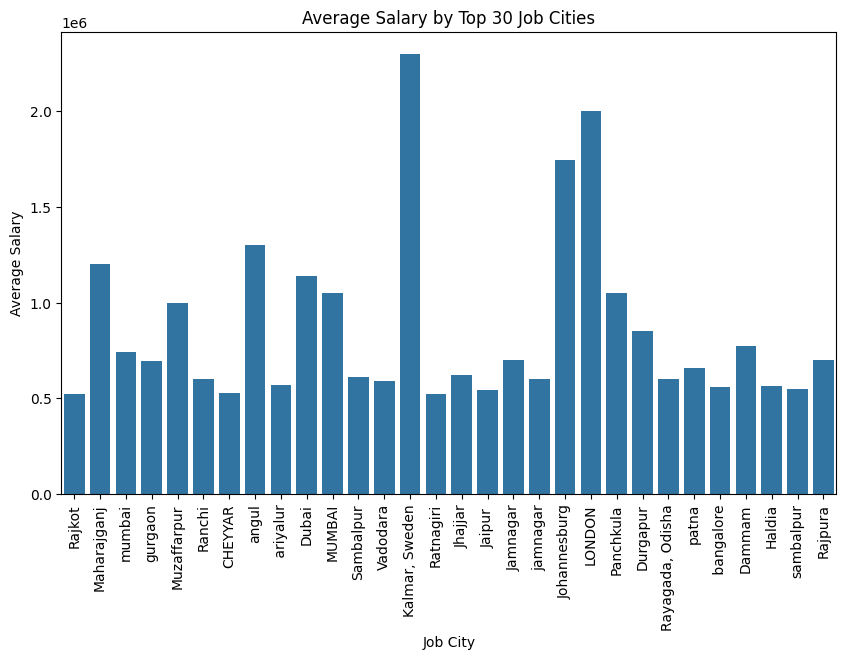

In [20]:
# Step 1: Calculate the average salary for each job city
average_salary_by_job_city = data.groupby('JobCity')['Salary'].mean().reset_index()

# Step 2: Select the top 30 job cities based on average salary
top_30_job_cities = average_salary_by_job_city.nlargest(30, 'Salary')['JobCity']

# Step 3: Filter the original data to include only the top 30 job cities
filtered_data = data[data['JobCity'].isin(top_30_job_cities)]

# Step 4: Plot the average salary by job city for the top 30 job cities
plt.figure(figsize=(10, 6))
sns.barplot(x='JobCity', y='Salary', data=filtered_data, estimator='mean', errorbar=None)
plt.title('Average Salary by Top 30 Job Cities')
plt.xlabel('Job City')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Salary vs JobCity: Top 3 Job City which make more average salary are Sweden, London and Johannesburg.

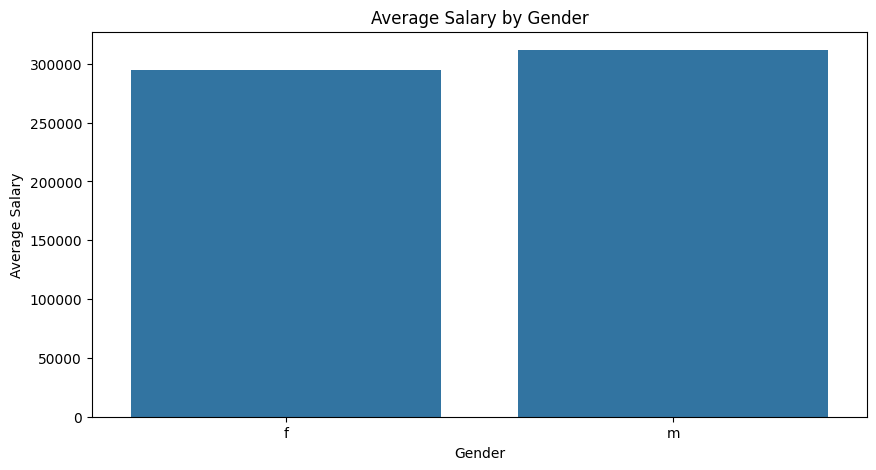

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Salary', data=data, estimator='mean', errorbar=None)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

`Salary vs Gender`: Average salary of male and female is almost same.

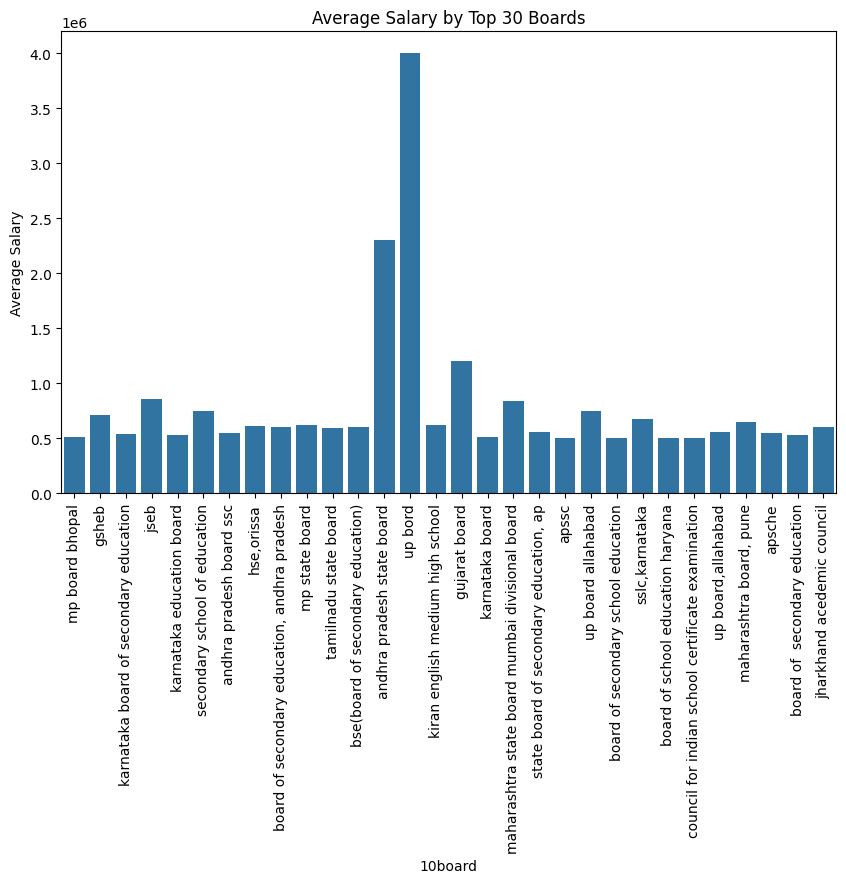

In [22]:
# Step 1: Calculate the average salary for each board
average_salary_by_board = data.groupby('10board')['Salary'].mean().reset_index()

# Step 2: Select the top 30 boards based on average salary
top_30_boards = average_salary_by_board.nlargest(30, 'Salary')['10board']

# Step 3: Filter the original data to include only the top 30 boards
filtered_data = data[data['10board'].isin(top_30_boards)]

# Step 4: Plot the average salary by board for the top 30 boards
plt.figure(figsize=(10, 6))
sns.barplot(x='10board', y='Salary', data=filtered_data, estimator='mean', errorbar=None)
plt.title('Average Salary by Top 30 Boards')
plt.xlabel('10board')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)  
plt.show()

`Salary vs 10board`: Top 3 10board which make more average salary are UP Board, AP Board and Gujarat Board.

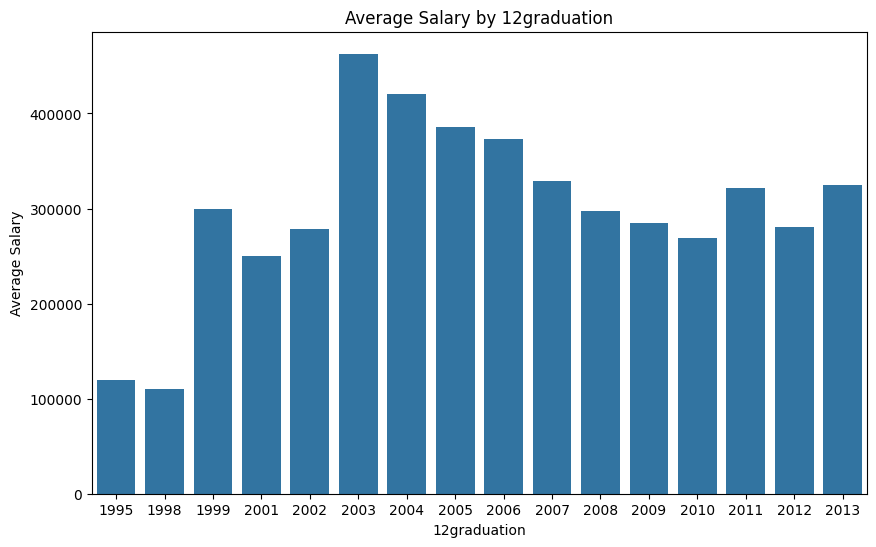

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='12graduation', y='Salary', data=data, estimator='mean', errorbar=None)
plt.title('Average Salary by 12graduation')
plt.xlabel('12graduation')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

`Salary vs 12graduation`: Top 3 12graduation which make more average salary are 2003, 2004 and 2005.

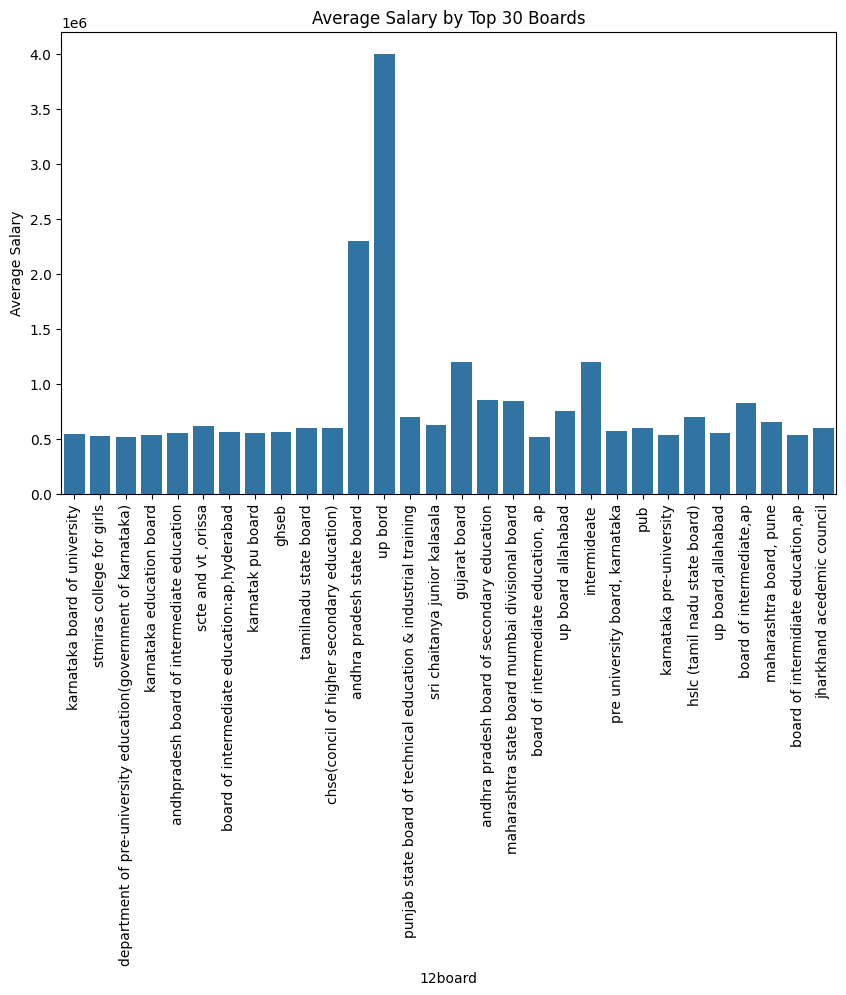

In [24]:
# Step 1: Calculate the average salary for each board
average_salary_by_board = data.groupby('12board')['Salary'].mean().reset_index()

# Step 2: Select the top 30 boards based on average salary
top_30_boards = average_salary_by_board.nlargest(30, 'Salary')['12board']

# Step 3: Filter the original data to include only the top 30 boards
filtered_data = data[data['12board'].isin(top_30_boards)]

# Step 4: Plot the average salary by board for the top 30 boards
plt.figure(figsize=(10, 6))
sns.barplot(x='12board', y='Salary', data=filtered_data, estimator='mean', errorbar=None)
plt.title('Average Salary by Top 30 Boards')
plt.xlabel('12board')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

`Salary vs 12board`: Top 3 12board which make more average salary are UP Board, AP Board and Gujarat Board.

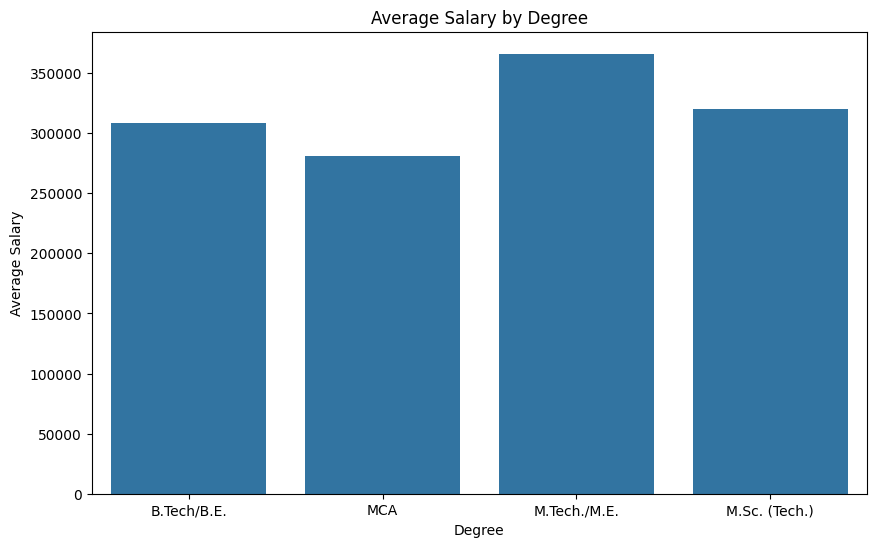

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Salary', data=data, estimator='mean', errorbar=None)
plt.title('Average Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

`Salary vs Degree`: Degree with M.Tech/M.E. make more average salary.

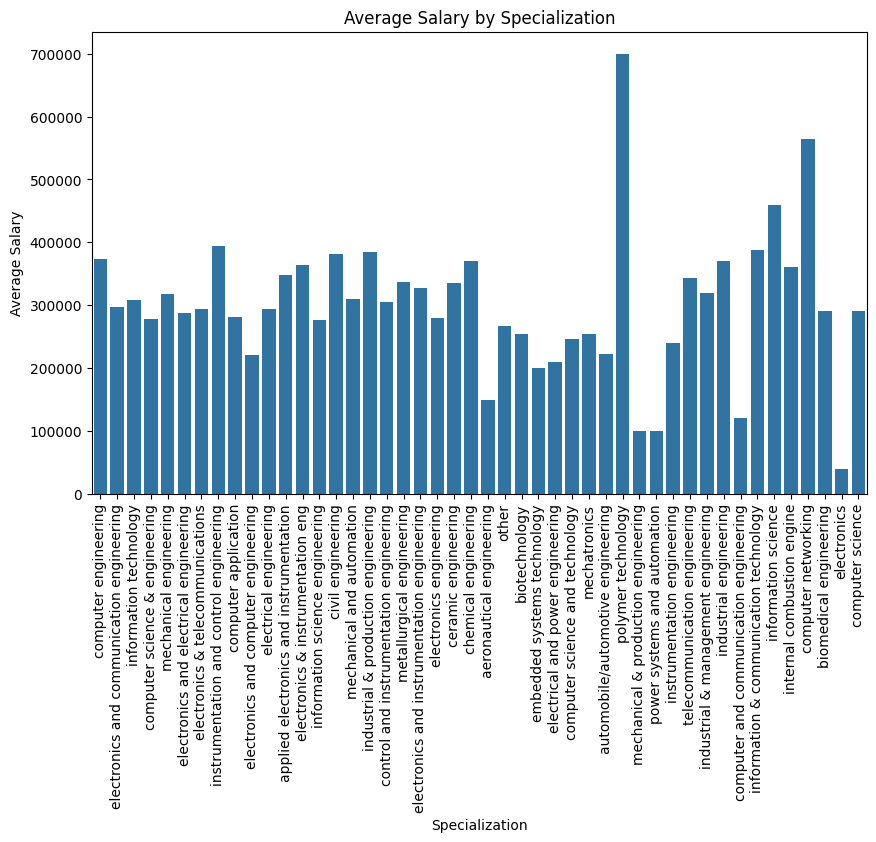

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Specialization', y='Salary', data=data, estimator='mean', errorbar=None)
plt.title('Average Salary by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

`Salary vs Specialization`: Top 3 specialization which make more average salary are Polymer Technology, Computer Networking and Informaiton Science.

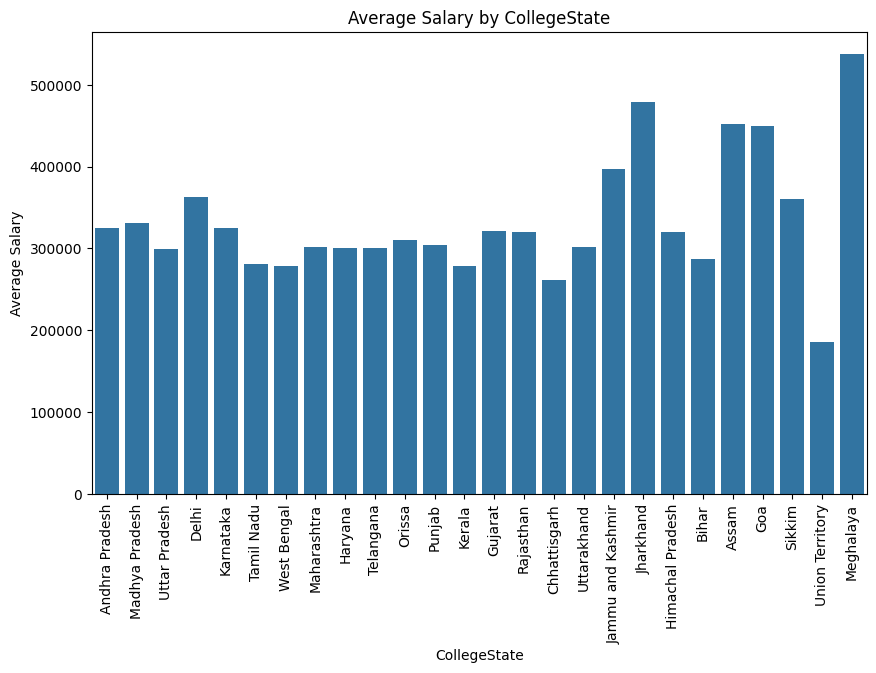

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CollegeState', y='Salary', data=data, estimator='mean', errorbar=None)
plt.title('Average Salary by CollegeState')
plt.xlabel('CollegeState')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

`Salary vs CollegeState`: Top 3 College State which make more average salary are Meghalaya, Jharkhand and Assam.

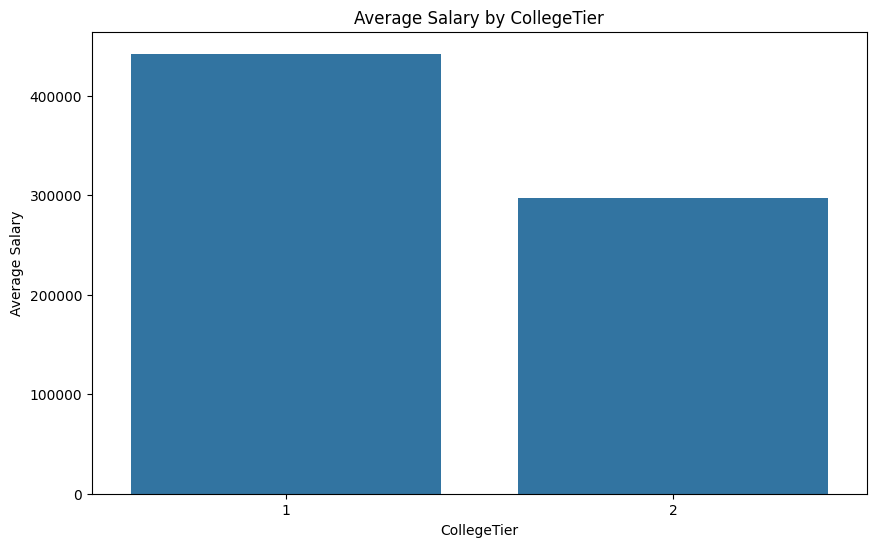

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CollegeTier', y='Salary', data=data, estimator='mean', errorbar=None)
plt.title('Average Salary by CollegeTier')
plt.xlabel('CollegeTier')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

`Salary vs CollegeTier`: Average Salary of 1st Tier College is more than the 2nd Tier College.

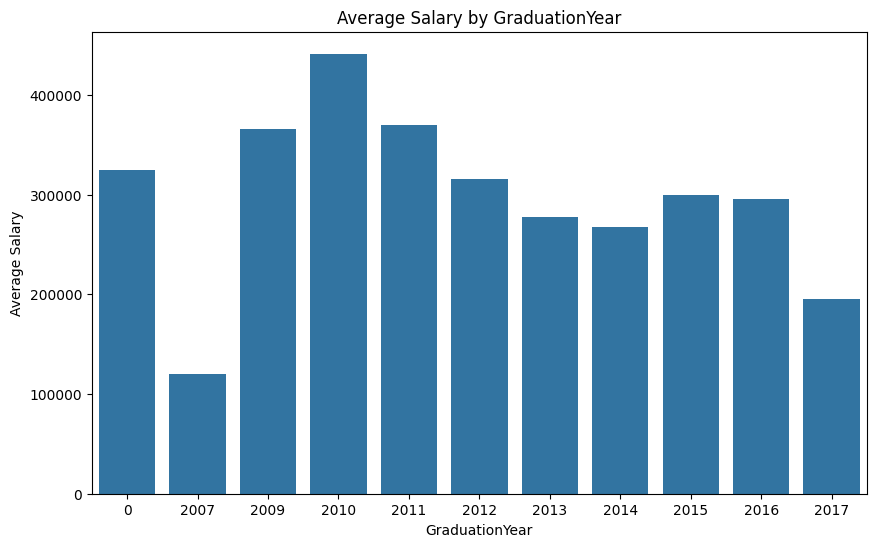

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GraduationYear', y='Salary', data=data, estimator='mean', errorbar=None)
plt.title('Average Salary by GraduationYear')
plt.xlabel('GraduationYear')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

`Salary vs GraduationYear`: Top 3 Graduation Year which make more average salary are 2010, 2009 and 2011.

#### Categorical vs Categorical

                    Designation  Female  Male
0             software engineer     131   408
1            software developer      57   208
2               system engineer      46   159
3            programmer analyst      39   100
4              systems engineer      31    87
5        java software engineer      14    97
6        software test engineer      31    69
7              project engineer      15    62
8    technical support engineer      21    55
9      senior software engineer      16    56
10               java developer      17    50
11                test engineer      13    44
12                web developer      17    37
13        application developer      16    36
14            assistant manager       7    45
15             network engineer       8    43
16             business analyst      19    30
17                 data analyst      16    33
18                     engineer       5    42
19            android developer      14    32
20  associate software engineer   

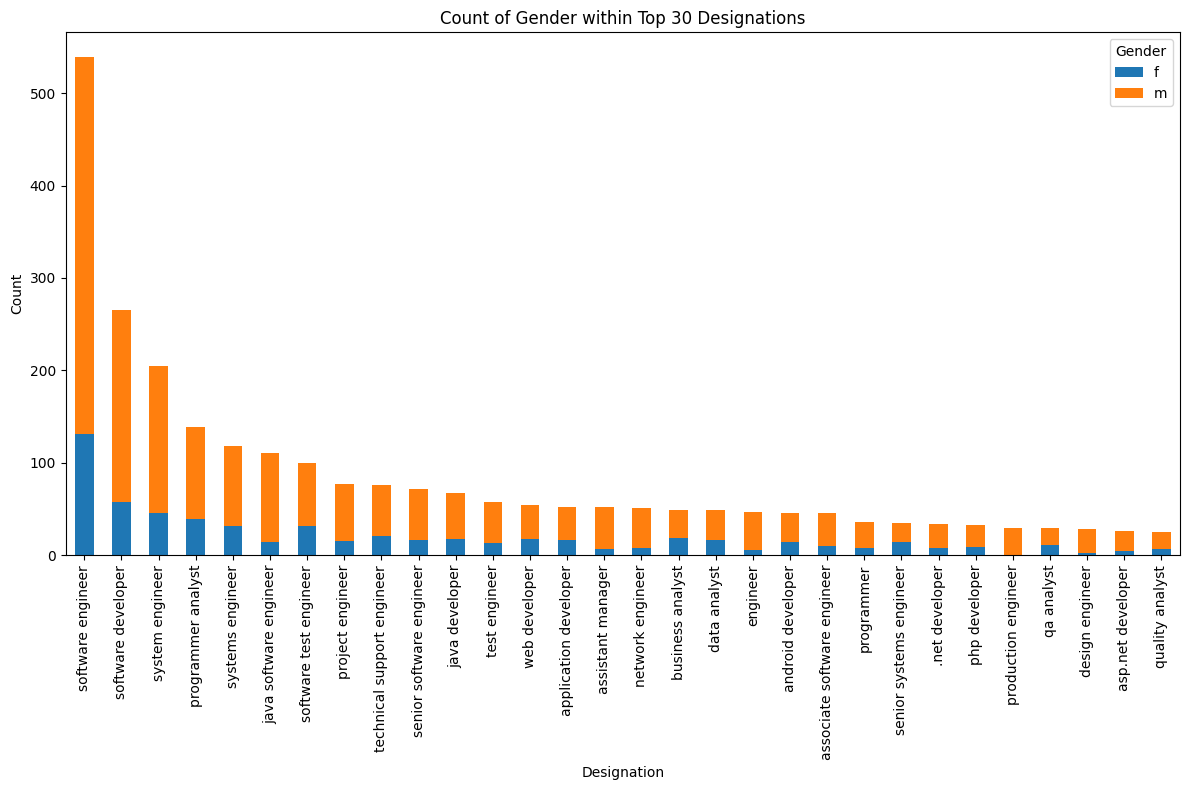

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# Step 1: Create the crosstab for Designation and Gender
data_counts = pd.crosstab(data['Designation'], data['Gender'])

# Step 2: Sort the data by total count of each designation and select the top 30 designations
top_30_designations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_designations]

# Create a new DataFrame for display
display_df = data_counts_top_30[['f', 'm']].copy()
# Rename columns for clarity
display_df.columns = ['Female', 'Male']
# Add a column for specialization names
display_df['Designation'] = data_counts_top_30.index
# Reset index to make 'Specialization' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Specialization' first
display_df = display_df[['Designation', 'Female', 'Male']]
# Display the DataFrame
print(display_df)

# Step 4: Plot the stacked bar plot for the top 30 designations
data_counts_top_30.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Gender within Top 30 Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Designation vs Gender`: In top 30 Designation, there are more male candidates compared to female candidates in each designation.

                    Designation  Board_cbse  Board_state board  Board_0  \
0             software engineer         190                152       28   
1            software developer          84                 96       17   
2               system engineer          80                 54       27   
3            programmer analyst          49                 38       20   
4              systems engineer          48                 20       10   
5        java software engineer          30                 50        4   
6        software test engineer          35                 28       13   
7              project engineer          27                 11        8   
8    technical support engineer          36                 20        2   
9      senior software engineer          16                 12       11   
10               java developer          14                 34        6   
11                test engineer          18                 18        5   
12                web dev

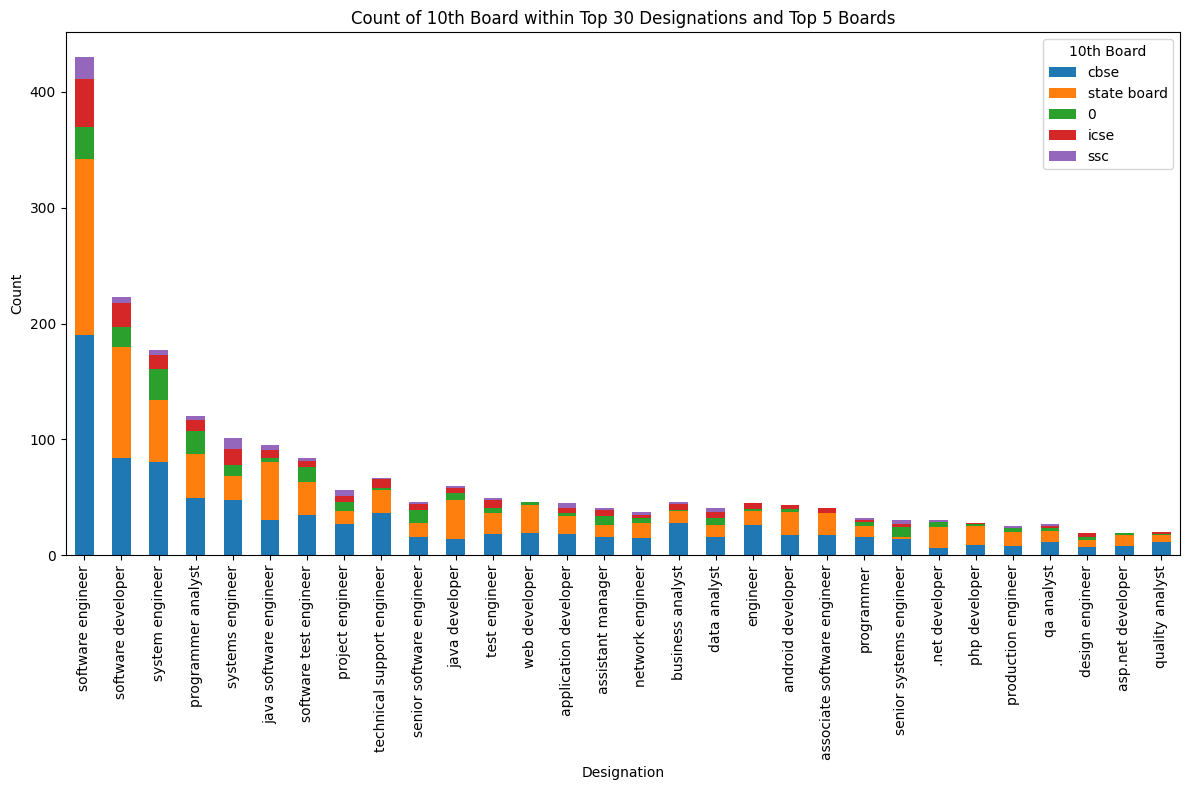

In [31]:
# Step 1: Create the crosstab for Designation and 10th Board
data_counts = pd.crosstab(data['Designation'], data['10board'])

# Step 2: Sort the data by total count of each designation and select the top 30 designations
top_30_designations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_designations]

# Step 3: Sort the data by total count of each board and select the top 5 boards
top_5_boards = data_counts.sum(axis=0).nlargest(5).index
data_counts_top_30_top_5_boards = data_counts_top_30[top_5_boards]

# Create a new DataFrame for display
display_df = data_counts_top_30_top_5_boards.copy()
# Rename columns for clarity
display_df.columns = [f'Board_{board}' for board in top_5_boards]
# Add a column for Designation names
display_df['Designation'] = data_counts_top_30_top_5_boards.index
# Reset index to make 'Designation' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Designation' first
display_df = display_df[['Designation'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 5: Plot the stacked bar plot for the top 30 designations and top 5 boards
data_counts_top_30_top_5_boards.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of 10th Board within Top 30 Designations and Top 5 Boards')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='10th Board')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Designation vs 10board`: In top 30 Designation, CBSE Board and State Board candidates are more than any other board candidates.

                    Designation  Stream_2009  Stream_2008  Stream_2010  \
0             software engineer          160          127           89   
1            software developer           79           56           42   
2               system engineer           48           63           38   
3            programmer analyst           30           28           35   
4              systems engineer           26           24           34   
5        java software engineer           28           30           24   
6        software test engineer           23           21           17   
7              project engineer           19           14           11   
8    technical support engineer           26           18           15   
9      senior software engineer           11           14            0   
10               java developer           21           16           16   
11                test engineer           17           10           16   
12                web developer       

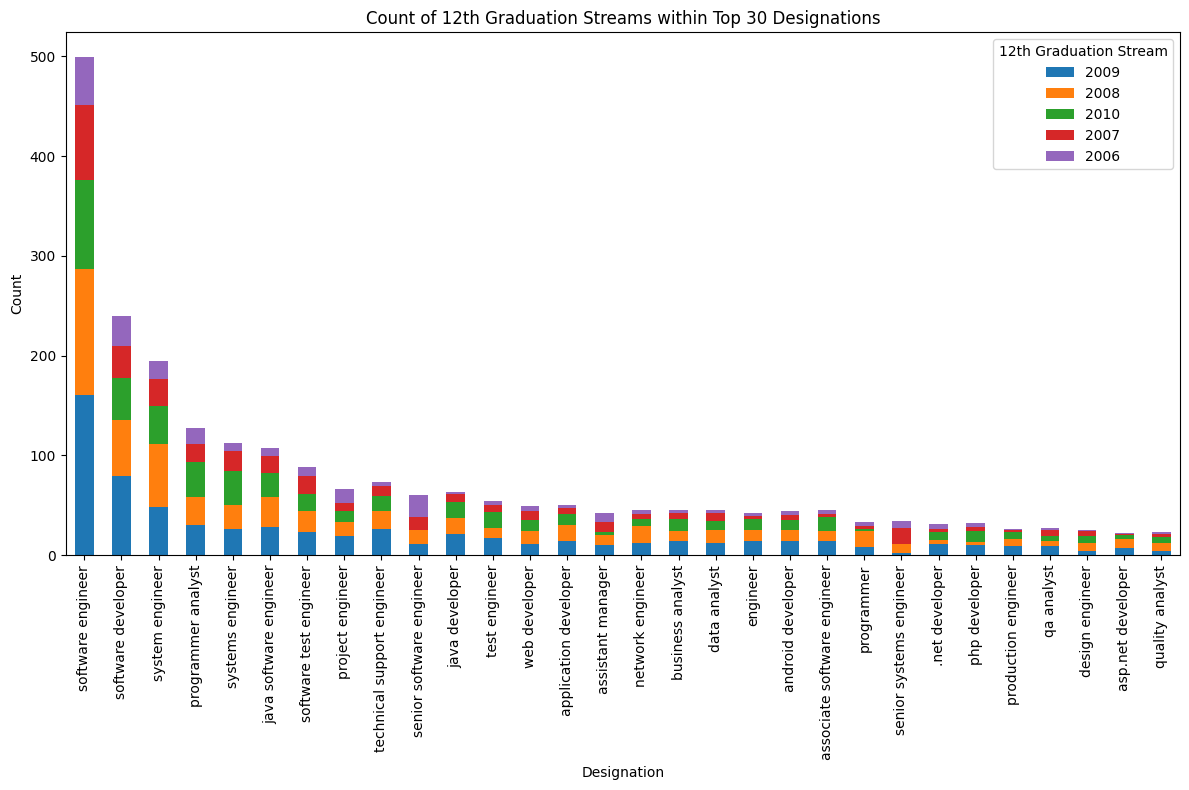

In [32]:
# Step 1: Create the crosstab for Designation and 12th Graduation Stream
data_counts = pd.crosstab(data['Designation'], data['12graduation'])

# Step 2: Sort the data by total count of each designation and select the top 30 designations
top_30_designations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_designations]

# Step 3: Sort the data by total count of each 12th graduation stream and select the top 5 streams
top_5_12graduation = data_counts.sum(axis=0).nlargest(5).index
data_counts_top_30_top_5_12graduation = data_counts_top_30[top_5_12graduation]

# Create a new DataFrame for display
display_df = data_counts_top_30_top_5_12graduation.copy()
# Rename columns for clarity
display_df.columns = [f'Stream_{stream}' for stream in top_5_12graduation]
# Add a column for Designation names
display_df['Designation'] = data_counts_top_30_top_5_12graduation.index
# Reset index to make 'Designation' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Designation' first
display_df = display_df[['Designation'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 5: Plot the stacked bar plot for the top 30 designations and top 5 12th graduation streams
data_counts_top_30_top_5_12graduation.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of 12th Graduation Streams within Top 30 Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='12th Graduation Stream')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Designation vs 12graduation`: In top 30 Designation, candidates from 2009 and 2008 who graduated from 12th are more than other graduated years.

                    Designation  Board_cbse  Board_state board  Board_0  \
0             software engineer         206                153       28   
1            software developer          91                 97       17   
2               system engineer          77                 56       29   
3            programmer analyst          47                 42       21   
4              systems engineer          53                 23       10   
5        java software engineer          33                 52        4   
6        software test engineer          30                 31       13   
7              project engineer          23                 16        8   
8    technical support engineer          29                 26        2   
9      senior software engineer          17                 14       11   
10               java developer          15                 35        7   
11                test engineer          17                 20        5   
12                web dev

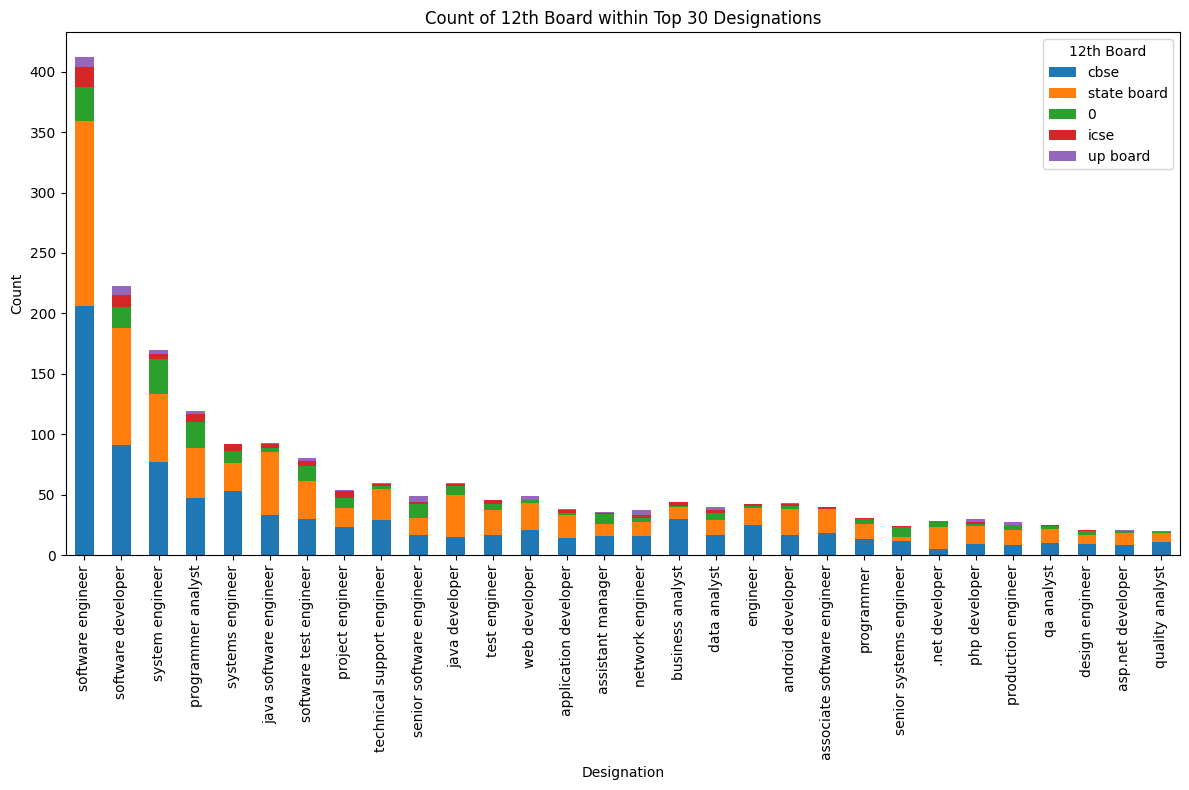

In [33]:
# Step 1: Create the crosstab for Designation and 12th Board
data_counts = pd.crosstab(data['Designation'], data['12board'])

# Step 2: Sort the data by total count of each designation and select the top 30 designations
top_30_designations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_designations]

# Step 3: Sort the data by total count of each 12th board and select the top 5 boards
top_5_12board = data_counts.sum(axis=0).nlargest(5).index
data_counts_top_30_top_5_12board = data_counts_top_30[top_5_12board]

# Create a new DataFrame for display
display_df = data_counts_top_30_top_5_12board.copy()
# Rename columns for clarity
display_df.columns = [f'Board_{board}' for board in top_5_12board]
# Add a column for Designation names
display_df['Designation'] = data_counts_top_30_top_5_12board.index
# Reset index to make 'Designation' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Designation' first
display_df = display_df[['Designation'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 5: Plot the stacked bar plot for the top 30 designations and top 5 12th boards
data_counts_top_30_top_5_12board.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of 12th Board within Top 30 Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='12th Board')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Designation vs 12board`: In top 30 Designation, CBSE Board and State Board candidates are more than any other board candidates.

                    Designation  Degree_B.Tech/B.E.  Degree_MCA  \
0             software engineer                 502          29   
1            software developer                 226          38   
2               system engineer                 200           4   
3            programmer analyst                 134           4   
4              systems engineer                 114           4   
5        java software engineer                  99          12   
6        software test engineer                  92           8   
7              project engineer                  72           3   
8    technical support engineer                  75           0   
9      senior software engineer                  66           4   
10               java developer                  58           9   
11                test engineer                  52           3   
12                web developer                  48           6   
13        application developer                  46           

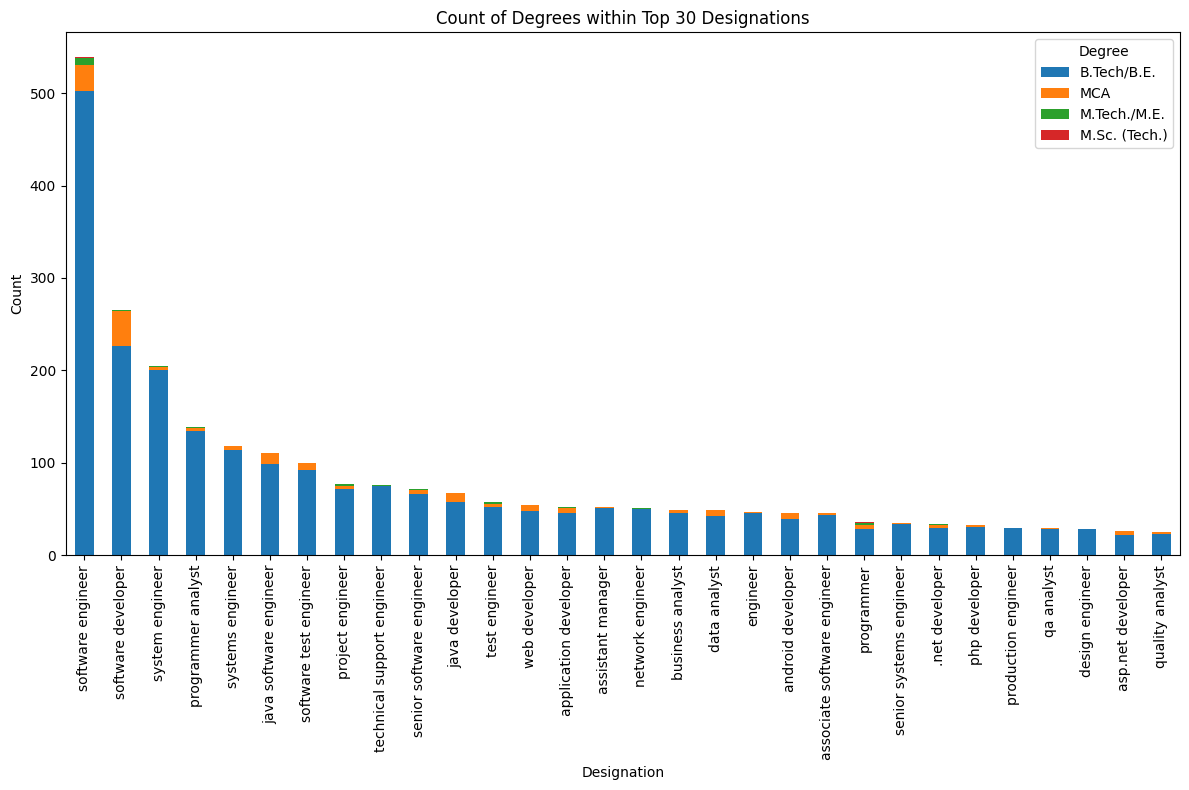

In [34]:
# Step 1: Create the crosstab for Designation and Degree
data_counts = pd.crosstab(data['Designation'], data['Degree'])

# Step 2: Sort the data by total count of each designation and select the top 30 designations
top_30_designations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_designations]

# Step 3: Sort the data by total count of each degree and select the top 5 degrees
top_5_degrees = data_counts.sum(axis=0).nlargest(5).index
data_counts_top_30_top_5_degrees = data_counts_top_30[top_5_degrees]

# Create a new DataFrame for display
display_df = data_counts_top_30_top_5_degrees.copy()
# Rename columns for clarity
display_df.columns = [f'Degree_{degree}' for degree in top_5_degrees]
# Add a column for Designation names
display_df['Designation'] = data_counts_top_30_top_5_degrees.index
# Reset index to make 'Designation' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Designation' first
display_df = display_df[['Designation'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 5: Plot the stacked bar plot for the top 30 designations and top 5 degrees
data_counts_top_30_top_5_degrees.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Degrees within Top 30 Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Degree')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Designation vs Degree`: In top 30 Designation, B.Tech/B.E. candidates are more than any other degree candidates.

                    Designation  \
0             software engineer   
1            software developer   
2               system engineer   
3            programmer analyst   
4              systems engineer   
5        java software engineer   
6        software test engineer   
7              project engineer   
8    technical support engineer   
9      senior software engineer   
10               java developer   
11                test engineer   
12                web developer   
13        application developer   
14            assistant manager   
15             network engineer   
16             business analyst   
17                 data analyst   
18                     engineer   
19            android developer   
20  associate software engineer   
21                   programmer   
22      senior systems engineer   
23               .net developer   
24                php developer   
25          production engineer   
26                   qa analyst   
27              desi

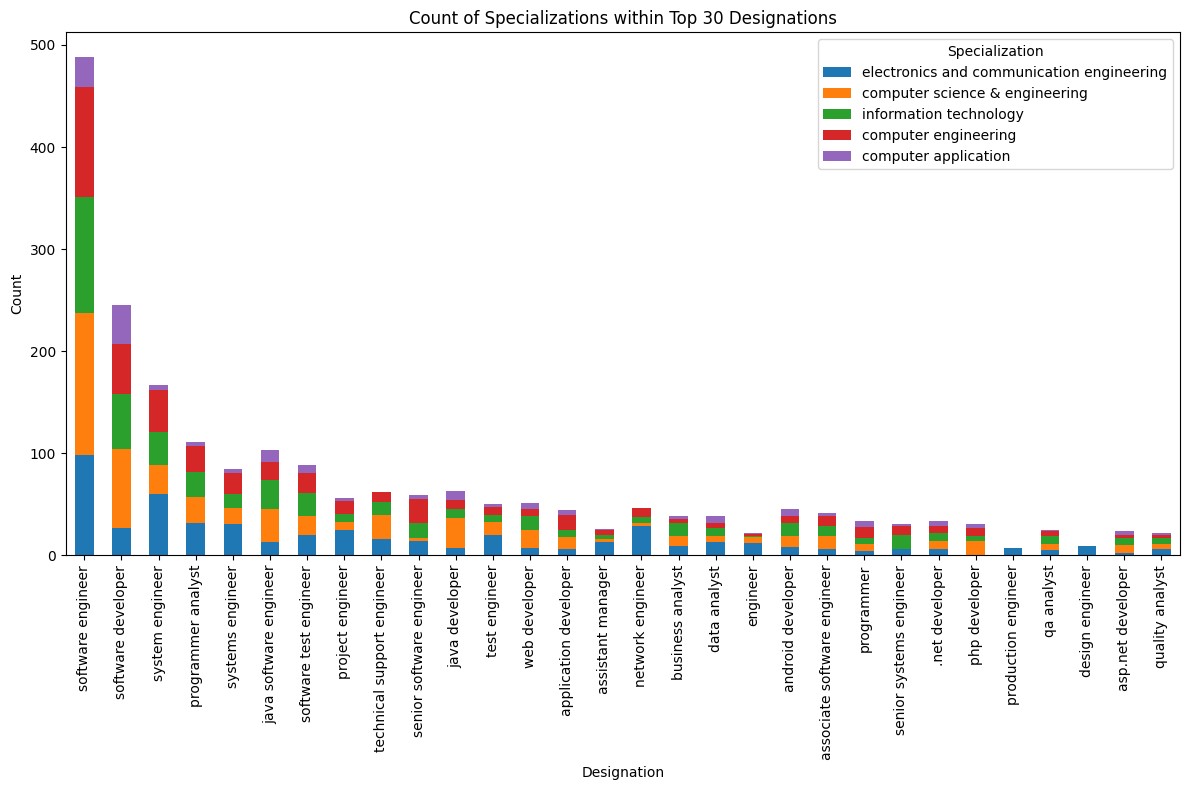

In [35]:
# Step 1: Create the crosstab for Designation and Specialization
data_counts = pd.crosstab(data['Designation'], data['Specialization'])

# Step 2: Sort the data by total count of each designation and select the top 30 designations
top_30_designations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_designations]

# Step 3: Sort the data by total count of each specialization and select the top 5 specializations
top_5_specializations = data_counts.sum(axis=0).nlargest(5).index
data_counts_top_30_top_5_specializations = data_counts_top_30[top_5_specializations]

# Create a new DataFrame for display
display_df = data_counts_top_30_top_5_specializations.copy()
# Rename columns for clarity
display_df.columns = [f'Specialization_{specialization}' for specialization in top_5_specializations]
# Add a column for Designation names
display_df['Designation'] = data_counts_top_30_top_5_specializations.index
# Reset index to make 'Designation' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Designation' first
display_df = display_df[['Designation'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 5: Plot the stacked bar plot for the top 30 designations and top 5 specializations
data_counts_top_30_top_5_specializations.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Specializations within Top 30 Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Specialization')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Designation vs Specialization`:

                    Designation  Year_2013  Year_2014  Year_2012  Year_2011  \
0             software engineer        185        125        112         68   
1            software developer         81         75         53         31   
2               system engineer         58         52         62         25   
3            programmer analyst         41         38         23         20   
4              systems engineer         26         37         22         23   
5        java software engineer         43         34         20          7   
6        software test engineer         32         22         19         13   
7              project engineer         20         12         18         10   
8    technical support engineer         26         22         19          6   
9      senior software engineer         12          2         16         18   
10               java developer         24         26         12          2   
11                test engineer         15         2

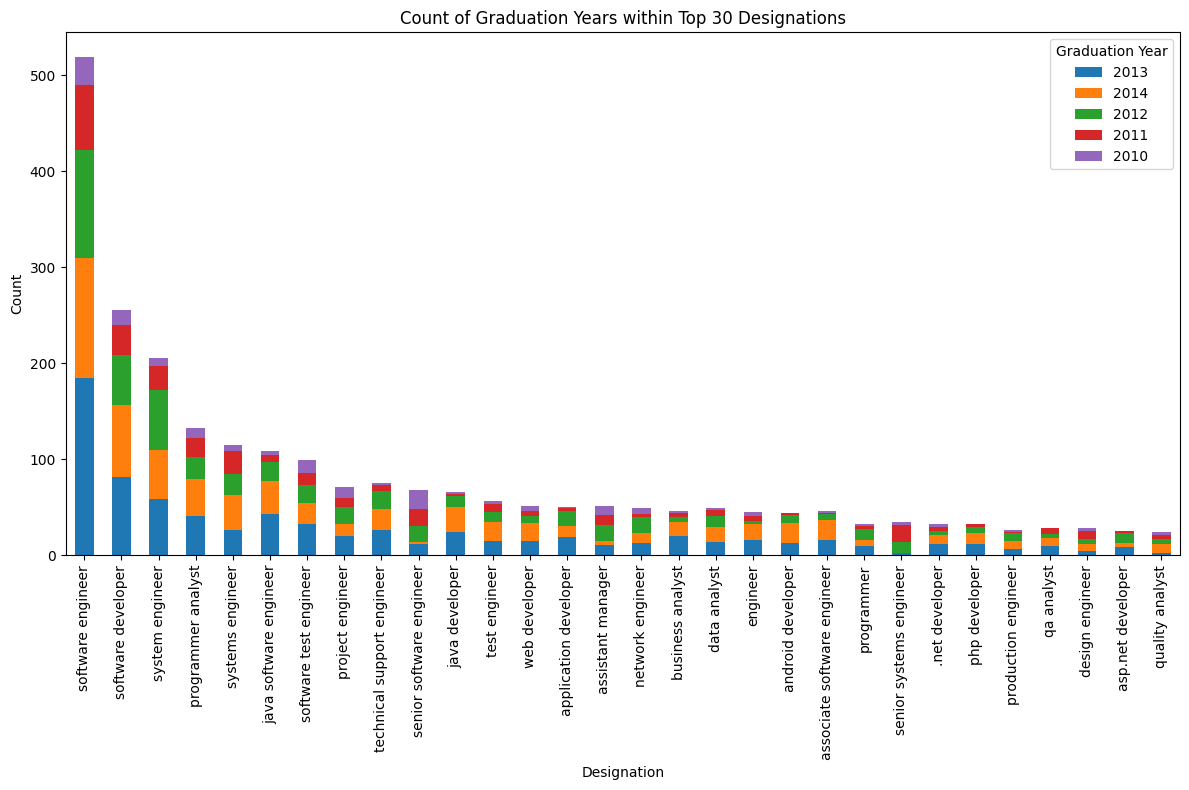

In [36]:
# Step 1: Create the crosstab for Designation and Graduation Year
data_counts = pd.crosstab(data['Designation'], data['GraduationYear'])

# Step 2: Sort the data by total count of each designation and select the top 30 designations
top_30_designations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_designations]

# Step 3: Sort the data by total count of each graduation year and select the top 5 graduation years
top_5_graduation_years = data_counts.sum(axis=0).nlargest(5).index
data_counts_top_30_top_5_graduation_years = data_counts_top_30[top_5_graduation_years]

# Create a new DataFrame for display
display_df = data_counts_top_30_top_5_graduation_years.copy()
# Rename columns for clarity
display_df.columns = [f'Year_{year}' for year in top_5_graduation_years]
# Add a column for Designation names
display_df['Designation'] = data_counts_top_30_top_5_graduation_years.index
# Reset index to make 'Designation' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Designation' first
display_df = display_df[['Designation'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 5: Plot the stacked bar plot for the top 30 designations and top 5 graduation years
data_counts_top_30_top_5_graduation_years.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Graduation Years within Top 30 Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.legend(title='Graduation Year')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Designation vs GraduationYear`: In top 30 Designation, 2013 and 2014 who graduated from college are more than other graduated years.

          JobCity  Gender_f  Gender_m
0       Bangalore       171       456
1              -1        92       369
2           Noida        87       281
3       Hyderabad       102       233
4            Pune        64       226
5         Chennai        71       201
6         Gurgaon        52       146
7       New Delhi        35       161
8          Mumbai        28        80
9         Kolkata        21        77
10         Jaipur        10        36
11        Lucknow         7        29
12         Mysore         8        28
13    Navi Mumbai        11        21
14        chennai         6        21
15     Chandigarh         8        18
16  Greater Noida         1        25
17           pune         9        17
18         Indore         3        21
19    Bhubaneswar        10        12
20     Coimbatore        10        10
21      Faridabad         0        18
22      Ahmedabad         1        16
23         Bhopal         2        15
24      hyderabad         7         9
25      Ghaz

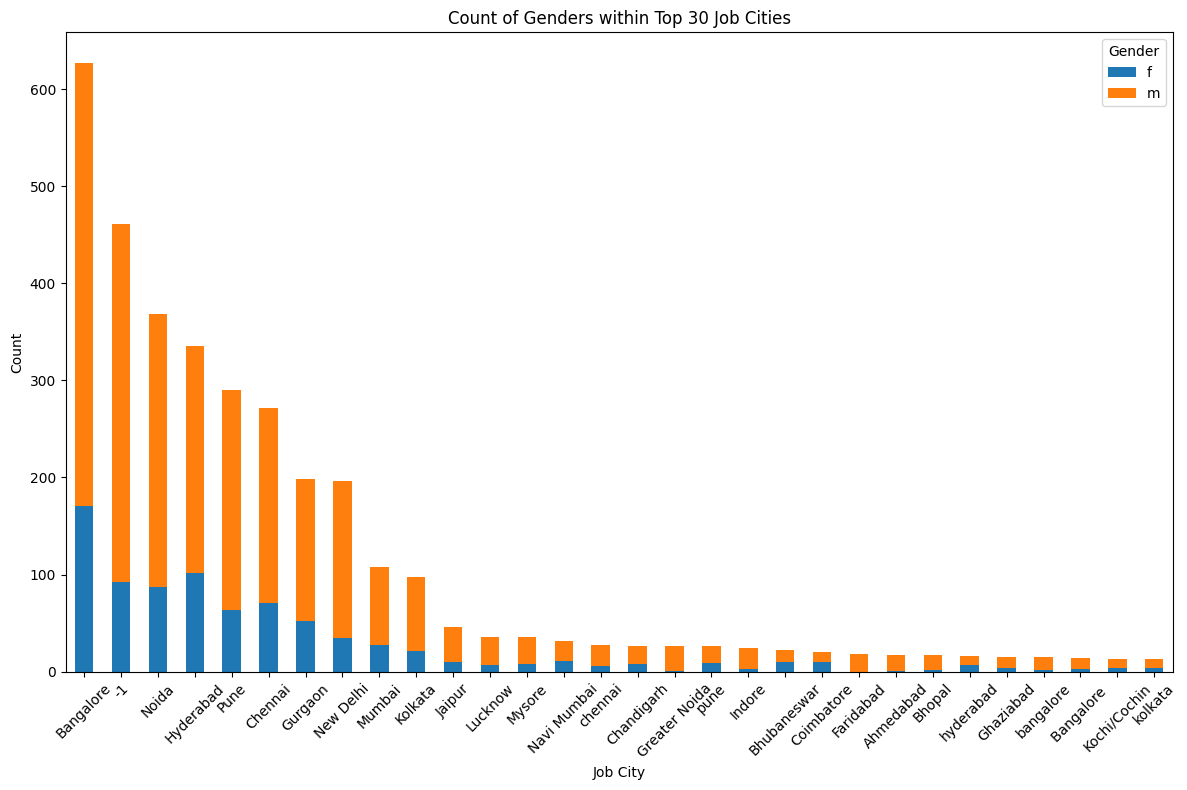

In [37]:
# Step 1: Create the crosstab for JobCity and Gender
data_counts = pd.crosstab(data['JobCity'], data['Gender'])

# Step 2: Sort the data by total count of each JobCity and select the top 30 JobCities
top_30_job_cities = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_job_cities]

# Create a new DataFrame for display
display_df = data_counts_top_30.copy()
# Rename columns for clarity
display_df.columns = [f'Gender_{gender}' for gender in data_counts.columns]
# Add a column for JobCity names
display_df['JobCity'] = data_counts_top_30.index
# Reset index to make 'JobCity' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'JobCity' first
display_df = display_df[['JobCity'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 4: Plot the stacked bar plot for the top 30 JobCities and all Genders
data_counts_top_30.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Genders within Top 30 Job Cities')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`JobCity vs Gender`: In top 30 Job City, male candidates are more than female candidates.

          JobCity  Degree_B.Tech/B.E.  Degree_MCA  Degree_M.Tech./M.E.  \
0       Bangalore                 574          40                   13   
1              -1                 429          25                    7   
2           Noida                 338          28                    2   
3       Hyderabad                 316          14                    5   
4            Pune                 271          17                    2   
5         Chennai                 264           7                    1   
6         Gurgaon                 178          18                    2   
7       New Delhi                 176          18                    2   
8          Mumbai                 106           2                    0   
9         Kolkata                  91           5                    2   
10         Jaipur                  41           3                    2   
11        Lucknow                  33           3                    0   
12         Mysore                  32 

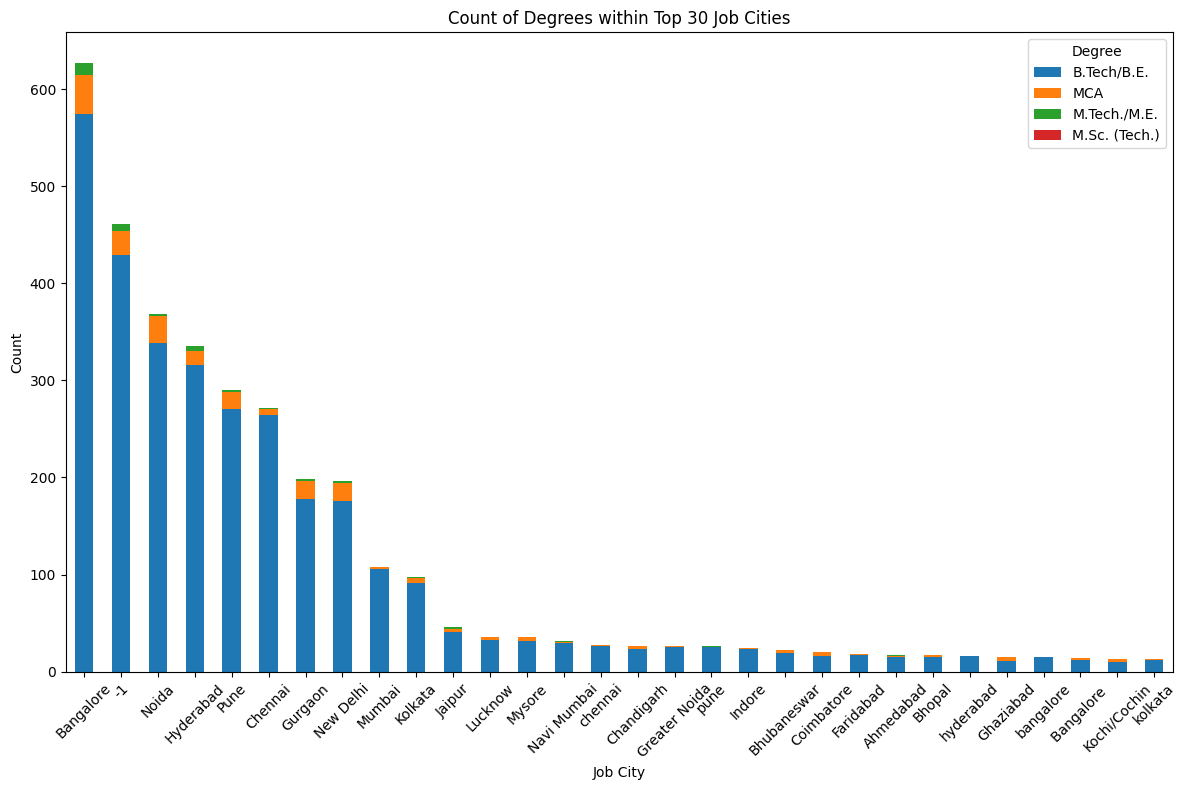

In [38]:
# Step 1: Create the crosstab for JobCity and Degree
data_counts = pd.crosstab(data['JobCity'], data['Degree'])

# Step 2: Sort the data by total count of each JobCity and select the top 30 JobCities
top_30_job_cities = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_job_cities]

# Step 3: Sort the data by total count of each Degree and select the top 5 Degrees
top_5_degrees = data_counts.sum(axis=0).nlargest(5).index
data_counts_top_30_top_5_degrees = data_counts_top_30[top_5_degrees]

# Create a new DataFrame for display
display_df = data_counts_top_30_top_5_degrees.copy()
# Rename columns for clarity
display_df.columns = [f'Degree_{degree}' for degree in top_5_degrees]
# Add a column for JobCity names
display_df['JobCity'] = data_counts_top_30_top_5_degrees.index
# Reset index to make 'JobCity' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'JobCity' first
display_df = display_df[['JobCity'] + list(display_df.columns[:-1])]
# Display the DataFrame
print(display_df)

# Step 5: Plot the stacked bar plot for the top 30 JobCities and top 5 Degrees
data_counts_top_30_top_5_degrees.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Degrees within Top 30 Job Cities')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Degree')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`JobCity vs Degree`: In top 30 Job City, B.Tech/B.E. degree candidates are more than any other degree candidates.

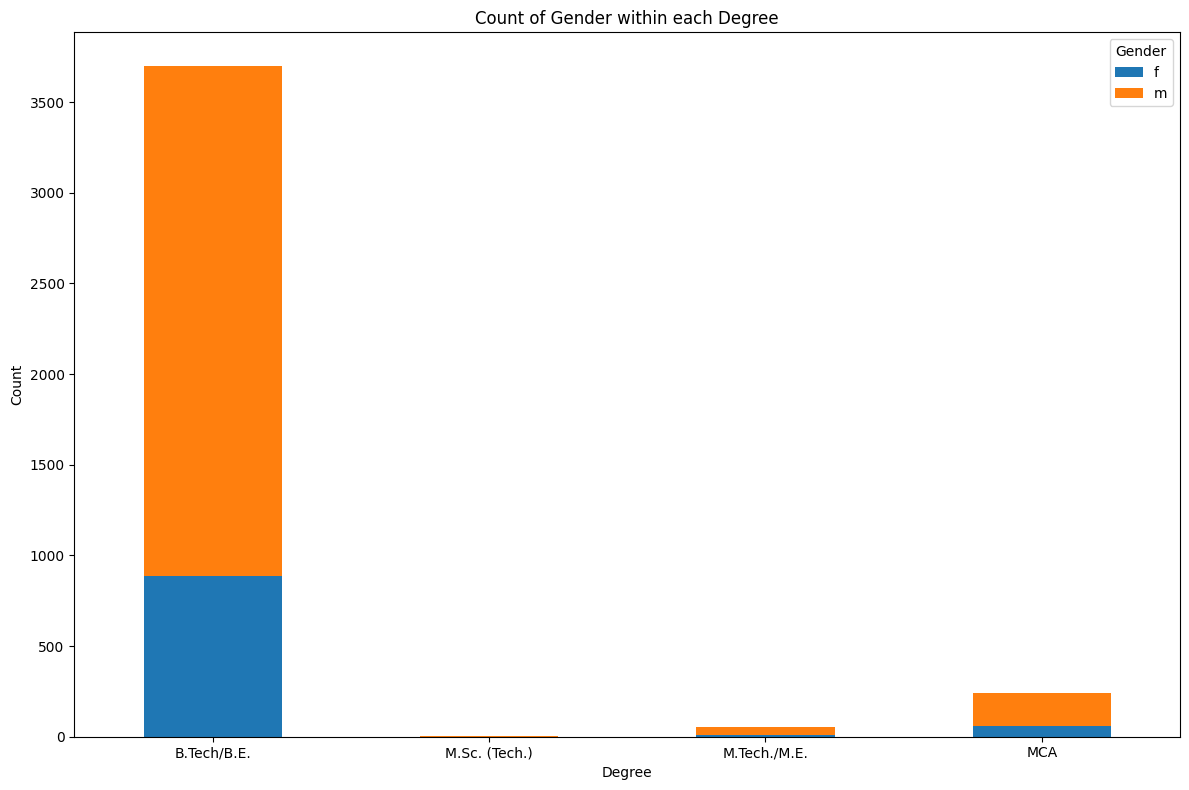

In [39]:
data_counts = pd.crosstab(data['Degree'], data['Gender'])
data_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Gender within each Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

`Gender vs Degree`: There are more male candidates in all degree programs then female candidates.

                                 Specialization  Female  Male
0     electronics and communication engineering     212   668
1                computer science & engineering     183   561
2                        information technology     173   487
3                          computer engineering     175   425
4                          computer application      59   185
5                        mechanical engineering      10   191
6        electronics and electrical engineering      34   162
7              electronics & telecommunications      28    93
8                        electrical engineering      17    65
9             electronics & instrumentation eng      10    22
10                            civil engineering       6    23
11  electronics and instrumentation engineering       5    22
12              information science engineering       8    19
13      instrumentation and control engineering       9    11
14                      electronics engineering       3    16
15      

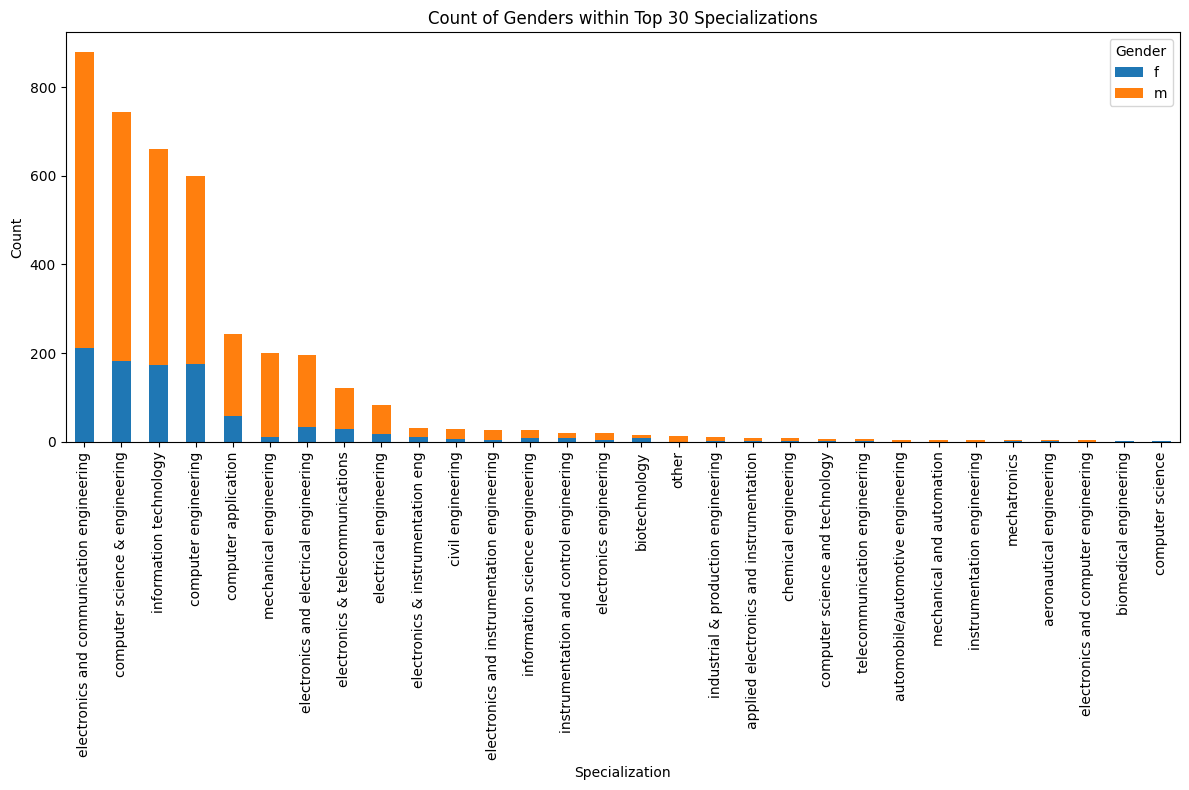

In [40]:
# Step 1: Create the crosstab for Specialization and Gender
data_counts = pd.crosstab(data['Specialization'], data['Gender'])

# Step 2: Sort the data by total count of each Specialization and select the top 30 Specializations
top_30_specializations = data_counts.sum(axis=1).nlargest(30).index
data_counts_top_30 = data_counts.loc[top_30_specializations]
    
# Create a new DataFrame for display
display_df = data_counts_top_30[['f', 'm']].copy()
# Rename columns for clarity
display_df.columns = ['Female', 'Male']
# Add a column for specialization names
display_df['Specialization'] = data_counts_top_30.index
# Reset index to make 'Specialization' a regular column
display_df = display_df.reset_index(drop=True)
# Reorder columns to have 'Specialization' first
display_df = display_df[['Specialization', 'Female', 'Male']]
# Display the DataFrame
print(display_df)
    
# Step 4: Plot the stacked bar plot for the top 30 Specializations and all Genders
data_counts_top_30.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Count of Genders within Top 30 Specializations')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.legend(title='Gender')
plt.tight_layout()  # Adjusts the layout so nothing is cut off
plt.show()

`Gender vs Specialization`: In top 30 Specialization, male candidates are more than any other female candidates in each specialization.

#### Is there a relationship between gender and specialization? (i.e., Does the preference of  Specialization depend on the Gender?)

In [41]:
# Import necessary function
from scipy.stats import chi2_contingency
import pandas as pd

# Filter the dataset to exclude 'other' specialization
gen_spec_df = df[df['Specialization'] != 'other']

# Create a contingency table for Gender and Specialization Category
cont_tab = pd.crosstab(index=gen_spec_df['Gender'], columns=gen_spec_df['Specialization'])

# Perform the Chi-Square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(cont_tab, correction=False)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

print('\n')

# Interpretation
if p_val < 0.05:
    print("There is a significant association between Gender and Specialization.")
else:
    print("There is no significant association between Gender and Specialization.")

Chi-Square Statistic: 100.14094373483611
P-value: 2.911010287276994e-06


There is a significant association between Gender and Specialization.
